<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Melanoma_with_CNN_with_Sigmoid_4_Pigmentation_rotate_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [1]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [4]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./Pigmentation/pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [5]:
pwd

'/content'

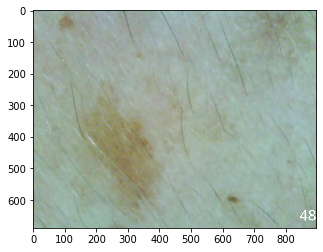

In [6]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [7]:
pigment_image.shape

(689, 898, 3)

In [0]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (192,256,3))


In [0]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

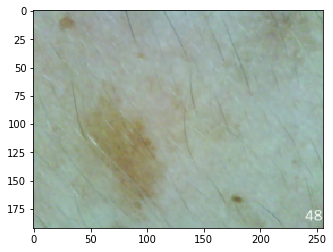

In [10]:
plt.imshow(pigment_image_resized)
plt.show()

In [11]:
type(pigment_image)

numpy.ndarray

In [0]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,192,256,3])

In [13]:
import scipy
scipy.__version__

'1.0.0'

In [14]:
!pip install pillow

In [0]:
if not (scipy.__version__ == '1.0.0'):
  !pip uninstall scipy==1.3.0
  !pip install scipy==1.0.0

In [16]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): 
    for filename in filenames:
        if re.search('d*.PNG', filename):
            filepath = os.path.join(root, filename)
            pig = ndimage.imread(filepath)
            pig_resized = skimage.transform.resize(pig, (192,256,3))  #redo this size or re-size later in Tensorflow
            pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
pigs = np.array(pigs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [17]:
filenames 

['6--09-28-am.PNG',
 '27--11-11-pm.PNG',
 '13--10-06-am.PNG',
 '8--09-29-am.PNG',
 '22--10-25-am.PNG',
 '17--10-13-am.PNG',
 '9--09-29-pm.PNG',
 '18--10-14-am.PNG',
 '2--09-23-pm.PNG',
 '14--10-10-am.PNG',
 '20--10-18-pm.PNG',
 '3--09-25-am.PNG',
 '26--11-10-am.PNG',
 '5--09-27-pm.PNG',
 '0-0--09-22-pm.PNG',
 '15--10-11-pm.PNG',
 '12--10-04-pm.PNG',
 '1-1--09-23-am.PNG',
 '19--10-16-pm.PNG',
 '25--11-06-pm.PNG',
 '21--10-120-pm.PNG',
 '16--10-12-pm.PNG',
 '4--09-25-pm.PNG',
 '11--10-02-pm.PNG',
 '10--09-30-pm.PNG',
 '7--09-28-pm.PNG',
 '23--10-28-pm.PNG',
 '24--11-04-am.PNG']

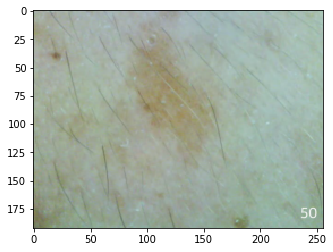

In [18]:
plt.imshow(pigs[0])


In [0]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [0]:

from skimage import data
from skimage.color import rgb2hsv, rgb2lab

In [0]:
from scipy import ndimage, misc
import re
import os
#there are 2594 photos
filenames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Training_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
           
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [0]:
#"/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"

from scipy import ndimage, misc
import re
import os
#there are 2594 photos
labelnames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
           
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [23]:
images = []
segs = []
for key in sorted(labelnames_dict.keys()):
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  seg = ndimage.imread(labelnames_dict[key], mode="L")
  images += [image]
  segs += [seg]
  
images = np.array(images)
segs = np.array(segs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


In [24]:
segs.shape

(2594, 192, 256)

In [25]:
images.shape

(2594, 192, 256, 3)

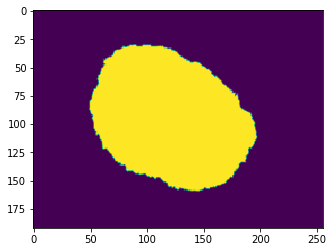

In [26]:
plt.imshow(segs[10])

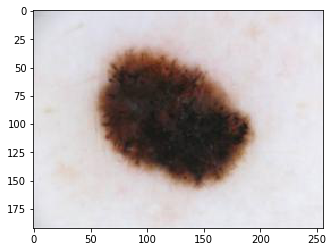

In [27]:
plt.imshow(images[10])

[[[0.17647059 0.15294118 0.2       ]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.23137255 0.22745098 0.28235294]
  [0.24313725 0.23529412 0.29019608]
  [0.25098039 0.24313725 0.29803922]]

 [[0.17254902 0.14901961 0.19607843]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.24313725 0.23921569 0.29411765]
  [0.2627451  0.25490196 0.30980392]
  [0.2745098  0.26666667 0.32156863]]

 [[0.16862745 0.14509804 0.19215686]
  [0.16862745 0.15686275 0.19215686]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.25098039 0.25098039 0.29803922]
  [0.27058824 0.2627451  0.31764706]
  [0.28235294 0.2745098  0.32941176]]

 ...

 [[0.34117647 0.31764706 0.3254902 ]
  [0.40784314 0.38431373 0.39215686]
  [0.49411765 0.47058824 0.47843137]
  ...
  [0.45882353 0.43529412 0.45098039]
  [0.41960784 0.39607843 0.41176471]
  [0.38431373 0.36078431 0.37647059]]

 [[0.29411765 0.27058824 0.27843137]
  [0.37254902 0.34901961 0.35686275]


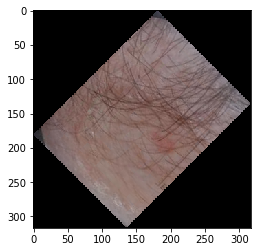

In [28]:
image = images[2580,:,:,:]/255
print(image)
rotate_image = ndimage.rotate(image, 45)
#rotate_image = misc.imresize(rotate_image, (192,256,6))
print(rotate_image)
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

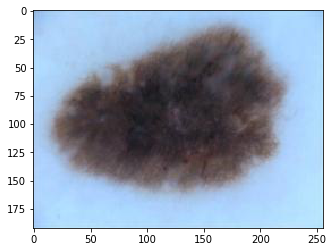

In [29]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

In [30]:
filepath

'./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4/24--11-04-am.PNG'

In [31]:
image.shape

(192, 256, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


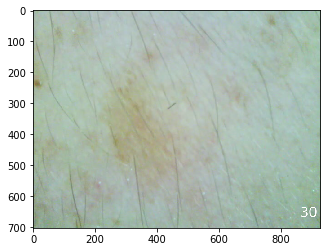

In [32]:
image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

**Check some features of the data to be sure that it uploaded properly**

check whether cells are aligned

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [34]:
trainim.shape

(2464, 192, 256, 3)

In [35]:
np.max(testlab)

255

In [36]:
testlab.shape

(130, 192, 256)

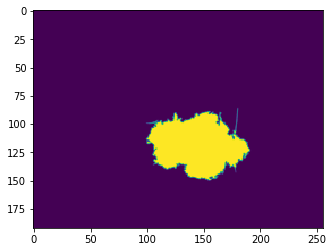

In [37]:
image = trainlab[0,:,:]
plt.imshow(image)
plt.show()

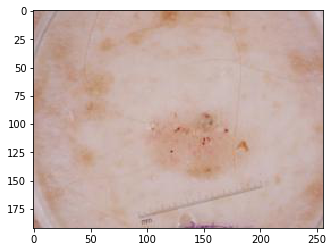

In [38]:
image = trainim[0,:,:,:]
plt.imshow(image)
plt.show()

In [0]:
def data_augmentations(features,lables,flag):
  if flag:
    #print("treat the first input image")
    #hsv_img = rgb2hsv(features[0])  #add 3 hsv channels       
    #plt.imshow(features[0])
    #plt.show()
    #plt.imshow(hsv_img)
    #plt.show()
    #print(hsv_img.dtype)
    #print(features[0].dtype)
    #print(hsv_img)
    #print(features[0])
    #l = rgb2lab(features[0])[:,:,0].reshape(192,256,1) #add the l channel from the lab space
    #image = np.concatenate((features[0]/255,hsv_img,l), axis =2)  #concatenate into one big image
    x2 = features[0].reshape([1,192,256,3]) #image.reshape([1,192,256,7])  #need to add "1" to first dimension for future concatenation
    image = features[0]
    #print("#flip the first image:")
    flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
    #plt.imshow(flip_ud_x2[0,:,:,:3])
   
    #plt.show()
    x2 = np.vstack((x2, flip_ud_x2)) 
    
    #print("#rotate the first image by a random angle")
    ra = np.random.random()*360
    rotate_x2 = ndimage.rotate(image, ra)
    #print(image)
    #print(rotate_x2)
    #plt.imshow(rotate_x2[:,:,:3])
    #plt.show()
    #print("test1")
    rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
    #plt.imshow(rotate_x2[0,:,:,:3])
    #print("test2")
    x2 = np.vstack((x2, rotate_x2 )) 
    
    #print("#treat the first label:")
    label = lables[0]
    #plt.imshow(label)
    #plt.show()
    y2 = label.reshape([1,192,256,1])
    #print("#flip the first label to match the first input image:")
    flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
    y2 = np.vstack((y2, flip_ud_y2)) 
    #plt.imshow(flip_ud_y2[0:,:,:,:])
    #plt.show()
    #print("#rotate the label by the same angle as the image")
    rotate_y2 = ndimage.rotate(label, ra)
    rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
    y2 = np.vstack((y2, rotate_y2)) 
    #plt.imshow(rotate_y2) 
    #plt.show()
  
    i = 1
    
    #print('#treat the subsequent images and labels')
    for image in features[1:]:
      #print(i)
      #plt.imshow(image)
      #plt.show()
      #hsv_img = rgb2hsv(image)  #add 3 hsv channels       
      #plt.imshow(hsv_img)
      #plt.show()
      #l = rgb2lab(image)[:,:,0].reshape(192,256,1) #add the l channel from the lab space
      #image = np.concatenate((image,hsv_img,l), axis =2)  #concatenate into one big image
      image2 = image.reshape([1,192,256,3])  #need to add "1" to first dimension for future concatenation
      
      x2 = np.vstack((x2, image2))
      #print('#flip the image:')
      flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
      x2 = np.vstack((x2, flip_ud_x2))
      #plt.imshow(flip_ud_x2[1,:,:,:3])
      #plt.show()
     
      #print('#rotate the image by a random angle')
      ra = np.random.random()*360
      rotate_x2 = ndimage.rotate(image, ra)
      rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
      x2 = np.vstack((x2, rotate_x2))
      #plt.imshow(rotate_x2[0,:,:,:3])
      #plt.show()
      
     
      #print('#treat the corresponding label:')
      label = lables[i]
      label2 = lables[i].reshape([1,192,256,1])
      #plt.imshow(label)
      #plt.show()
     
      y2 = np.vstack((y2,label2))
      #print('#flip the corresponding label to match the input image:')
      flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
      y2 = np.vstack((y2,flip_ud_y2))
      #plt.imshow(flip_ud_y2[0,:,:,:])
      #plt.show()
      
      
      #print('#rotate the label by the same angle as the image')
      rotate_y2 = ndimage.rotate(label, ra)
      rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
      y2 = np.vstack((y2,rotate_y2))
      #plt.imshow(rotate_y2) 
      #plt.show()
      
      #print('#scale images to 0-1 interval')
    x2 = x2/255
    y2 = y2/255
  else:
     x2 = features/255
     y2 = lables/255
  return x2, y2
    
  

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
       
        self.training_images = trainim   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
       
        self.training_labels = np.around(trainlab) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        
        
        
      
        self.test_images, labls = data_augmentations(testim, testlab,0)
        self.test_labels = labls.reshape((labls.shape[0],192,256))
       
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size], self.training_labels[0:xtra]))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size]
        #print(x.shape)
        x,y = data_augmentations(x,y,0)
        y = y.reshape((y.shape[0],192,256))
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

In [0]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

In [50]:
images.shape

(2594, 192, 256, 3)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,192,256,images.shape[3]])  #trace the shaping of these through the code...


In [0]:

y_true = tf.placeholder(tf.float32,shape=[None,192,256])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,192,256,images.shape[3]])  #-1 infers the shape of the first dimension (here, the batch size)

In [54]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,images.shape[3],16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.


In [55]:
print(convo_1_pooling.shape)

(?, 96, 128, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [57]:
print(convo_2_pooling.shape)

(?, 48, 64, 64)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [59]:
print(convo_3_pooling.shape)

(?, 24, 32, 128)


In [60]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [61]:
print(convo_4_pooling.shape)

(?, 12, 16, 256)


In [0]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [63]:
print(convo_5.shape)

(?, 12, 16, 512)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

###Need to look at the shapes and sizes of all of these layers###

In [66]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
(?, 24, 32, 256)


In [67]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

(?, 48, 64, 128)


In [68]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

(?, 96, 128, 128)


In [69]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

(?, 192, 256, 32)


In [70]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

(?, 192, 256, 16)


In [71]:
deconv_5.shape

TensorShape([Dimension(None), Dimension(192), Dimension(256), Dimension(16)])

In [0]:
y_pred = output

### Loss Function

In [0]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
union = sum_pred + sum_true - intersect  
jacc = intersect/union
            


#cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
#cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
cost =  tf.reduce_mean(tf.nn.relu(0.78 - jacc))
train = optimizer.minimize(cost)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

Session

In [77]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [78]:
tf.math.exp(1.)

<tf.Tensor 'Exp:0' shape=() dtype=float32>

starting init
done init
Currently on step 0
the time is  3.0369959999999985 

Avg Jacc is:


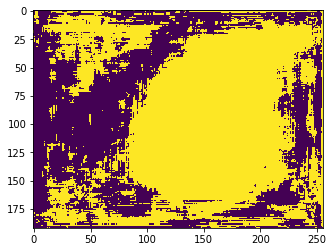

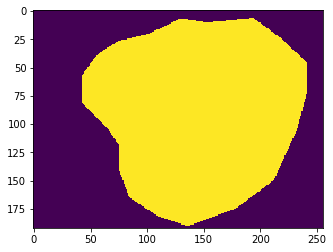

0.13949232835036057  step number is  0  batch_size is  16
Currently on step 100
the time is  15.729692000000004 

Avg Jacc is:


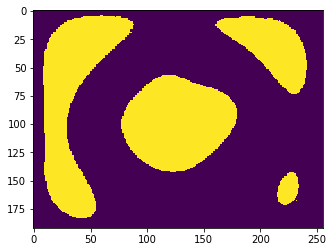

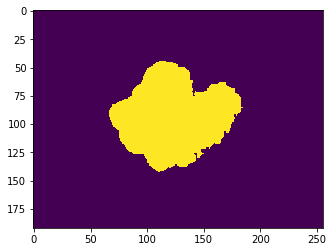

0.556575188269982  step number is  100  batch_size is  16
Currently on step 200
the time is  27.061545 

Avg Jacc is:


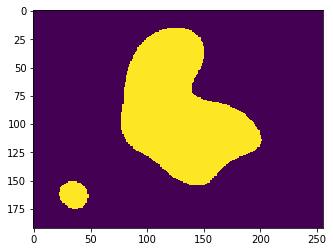

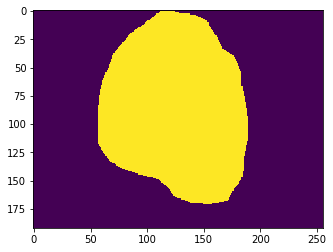

0.6450185922475962  step number is  200  batch_size is  16
Currently on step 300
the time is  38.325074 

Avg Jacc is:


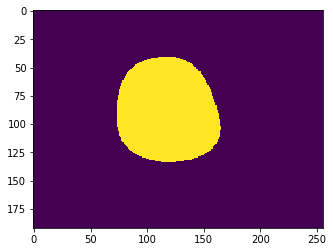

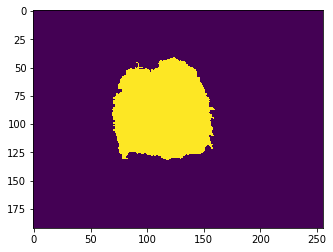

0.6592847383939303  step number is  300  batch_size is  16
Currently on step 400
the time is  49.591015 

Avg Jacc is:


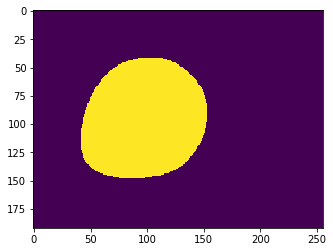

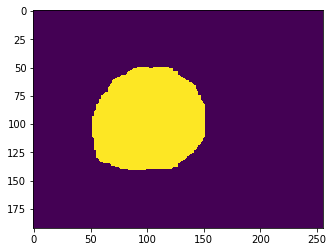

0.6966265751765325  step number is  400  batch_size is  16
Currently on step 500
the time is  60.83966199999999 

Avg Jacc is:


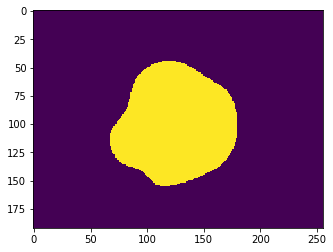

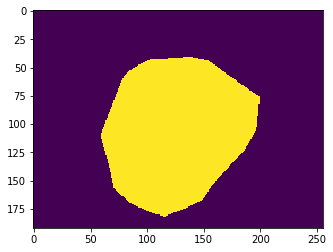

0.7252927339993991  step number is  500  batch_size is  16
Currently on step 600
the time is  72.112016 

Avg Jacc is:


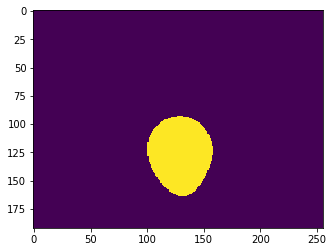

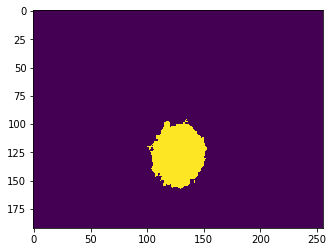

0.7132877643291767  step number is  600  batch_size is  16
Currently on step 700
the time is  83.477077 

Avg Jacc is:


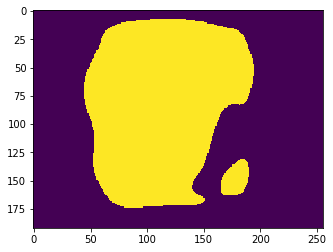

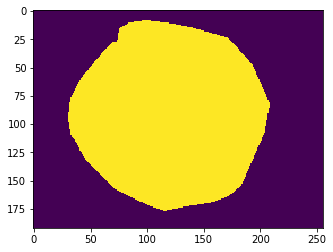

0.7381034851074219  step number is  700  batch_size is  16
Currently on step 800
the time is  94.86901 

Avg Jacc is:


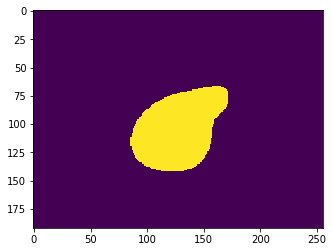

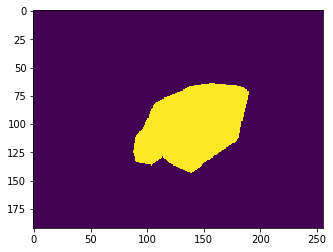

0.7291728679950421  step number is  800  batch_size is  16
Currently on step 900
the time is  106.09647999999999 

Avg Jacc is:


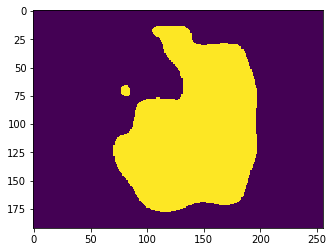

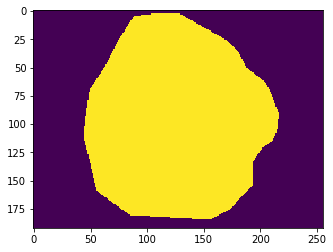

0.730349379319411  step number is  900  batch_size is  16
Currently on step 1000
the time is  117.299519 

Avg Jacc is:


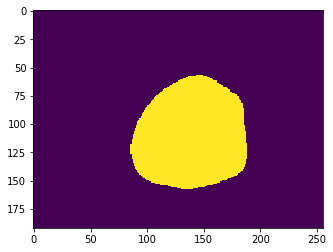

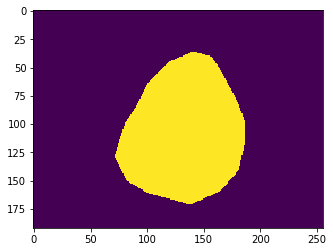

0.7420443021334134  step number is  1000  batch_size is  16
Currently on step 1100
the time is  128.475282 

Avg Jacc is:


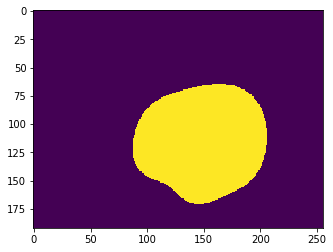

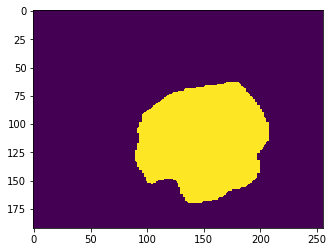

0.7432475163386418  step number is  1100  batch_size is  16
Currently on step 1200
the time is  139.857271 

Avg Jacc is:


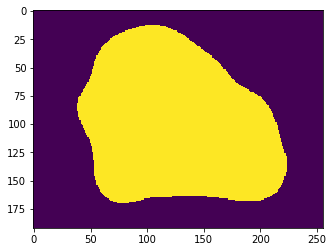

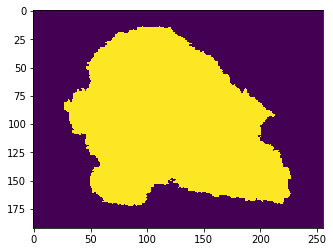

0.7360073383037861  step number is  1200  batch_size is  16
Currently on step 1300
the time is  151.137993 

Avg Jacc is:


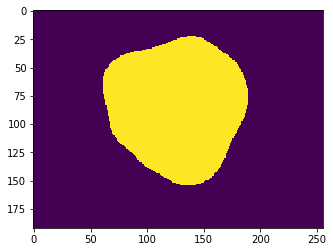

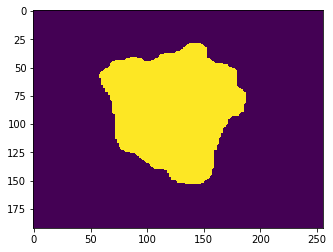

0.7242072472205529  step number is  1300  batch_size is  16
Currently on step 1400
the time is  162.26411 

Avg Jacc is:


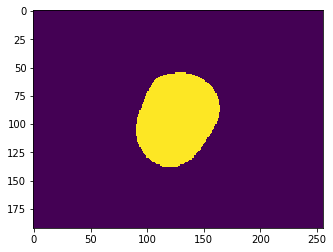

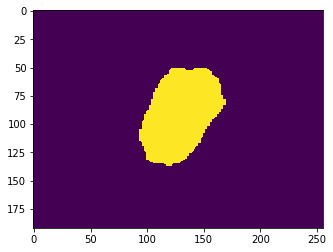

0.7515642606295072  step number is  1400  batch_size is  16
Currently on step 1500
the time is  173.465735 

Avg Jacc is:


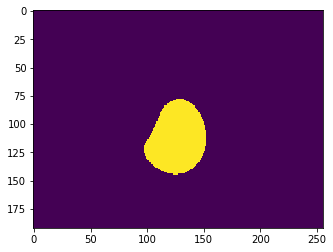

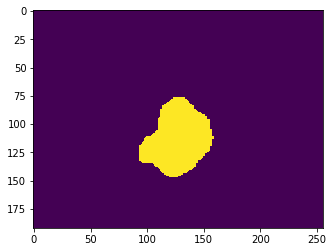

0.7387931236853966  step number is  1500  batch_size is  16
Currently on step 1600
the time is  184.664832 

Avg Jacc is:


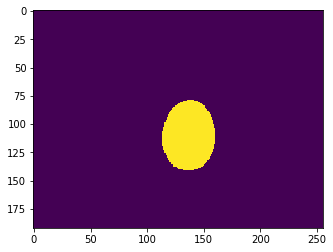

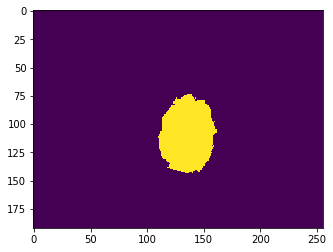

0.7459262554462139  step number is  1600  batch_size is  16
Currently on step 1700
the time is  195.877675 

Avg Jacc is:


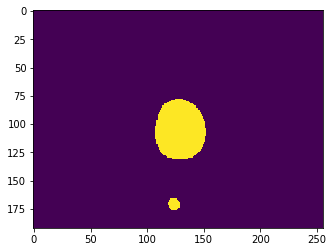

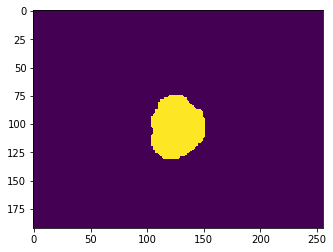

0.7149612426757812  step number is  1700  batch_size is  16
Currently on step 1800
the time is  207.188917 

Avg Jacc is:


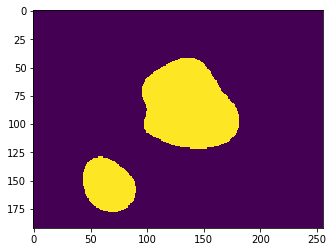

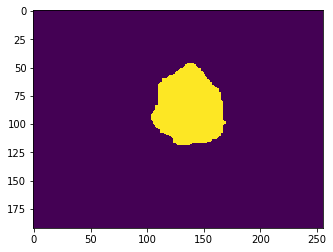

0.7473241952749399  step number is  1800  batch_size is  16
Currently on step 1900
the time is  218.496925 

Avg Jacc is:


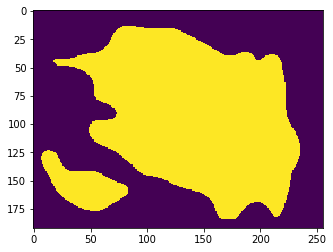

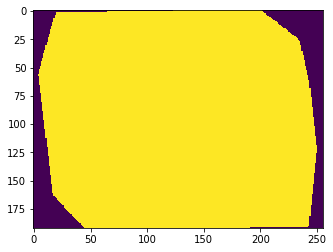

0.7502108060396635  step number is  1900  batch_size is  16
Currently on step 2000
the time is  229.790489 

Avg Jacc is:


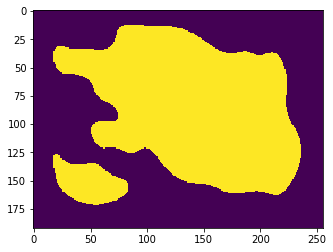

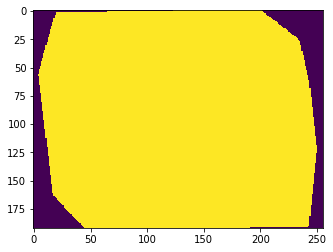

0.7531453059269831  step number is  2000  batch_size is  16
Currently on step 2100
the time is  241.06517300000002 

Avg Jacc is:


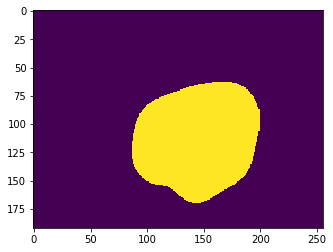

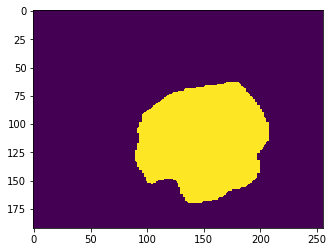

0.7424890371469351  step number is  2100  batch_size is  16
Currently on step 2200
the time is  252.41609 

Avg Jacc is:


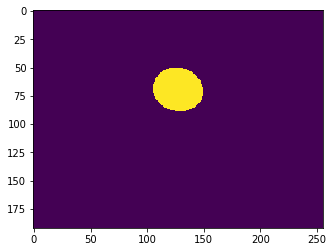

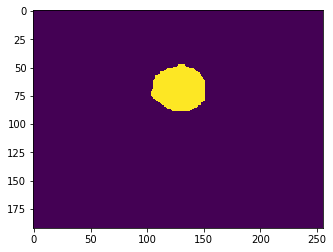

0.7669898399939904  step number is  2200  batch_size is  16
Currently on step 2300
the time is  263.863253 

Avg Jacc is:


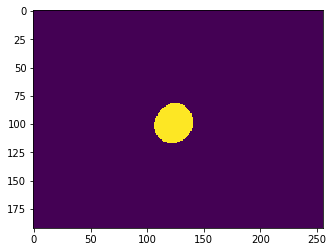

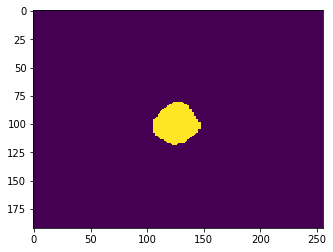

0.7496025085449218  step number is  2300  batch_size is  16
Currently on step 2400
the time is  275.133357 

Avg Jacc is:


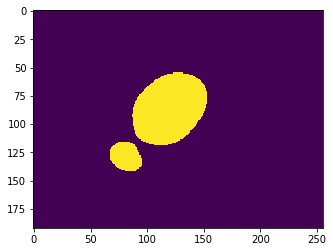

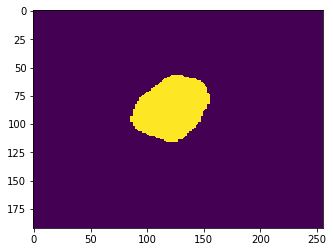

0.7585695706881009  step number is  2400  batch_size is  16
Currently on step 2500
the time is  286.379361 

Avg Jacc is:


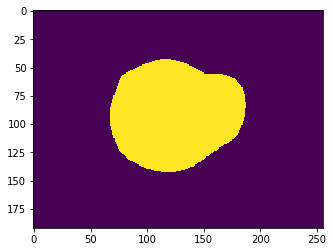

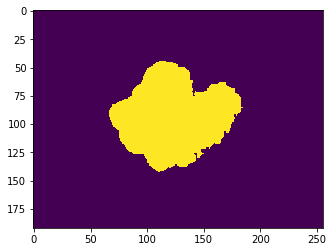

0.7642780597393329  step number is  2500  batch_size is  16
Currently on step 2600
the time is  297.567873 

Avg Jacc is:


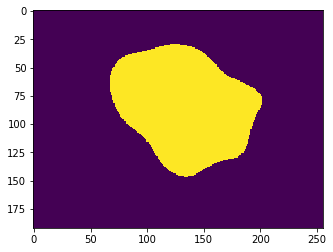

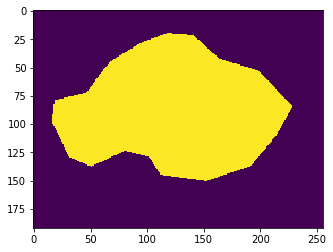

0.7673542903019832  step number is  2600  batch_size is  16
Currently on step 2700
the time is  308.852492 

Avg Jacc is:


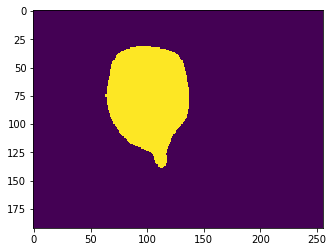

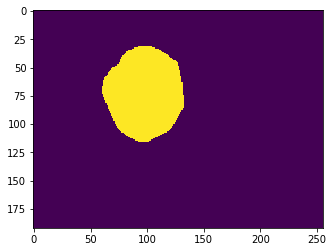

0.762509507399339  step number is  2700  batch_size is  16
Currently on step 2800
the time is  320.125346 

Avg Jacc is:


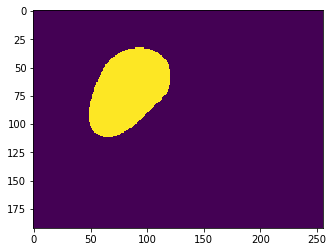

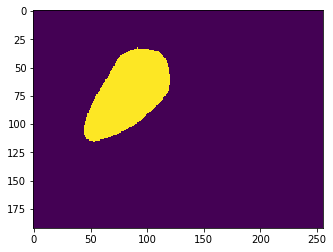

0.7698864276592549  step number is  2800  batch_size is  16
Currently on step 2900
the time is  331.41463699999997 

Avg Jacc is:


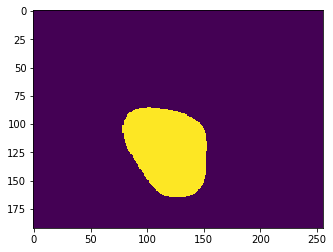

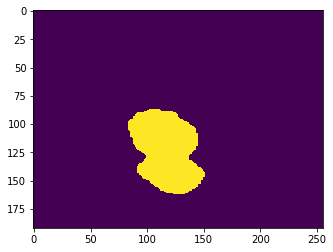

0.7663909912109375  step number is  2900  batch_size is  16
Currently on step 3000
the time is  342.634367 

Avg Jacc is:


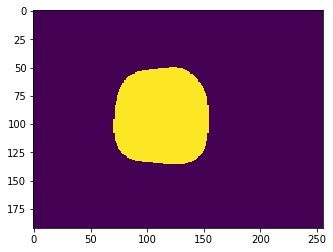

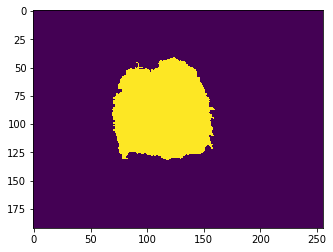

0.7571864201472356  step number is  3000  batch_size is  16
Currently on step 3100
the time is  353.840355 

Avg Jacc is:


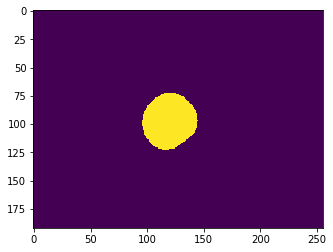

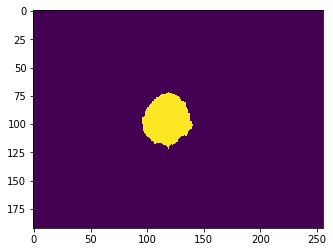

0.7649612426757812  step number is  3100  batch_size is  16
Currently on step 3200
the time is  365.100799 

Avg Jacc is:


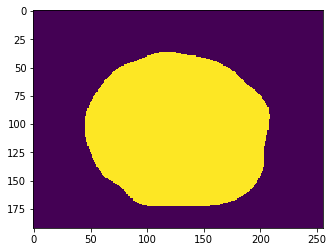

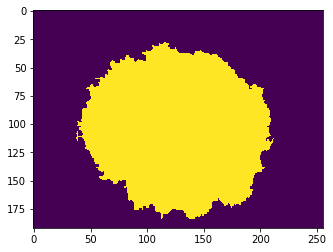

0.7653652484600361  step number is  3200  batch_size is  16
Currently on step 3300
the time is  376.259759 

Avg Jacc is:


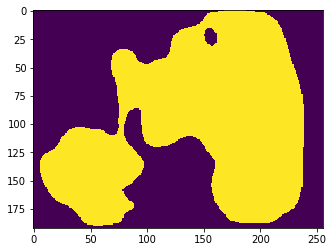

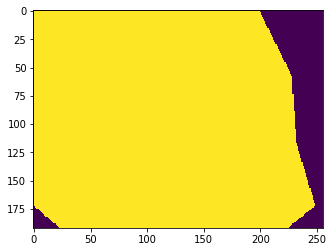

0.7708266038161058  step number is  3300  batch_size is  16
Currently on step 3400
the time is  387.468533 

Avg Jacc is:


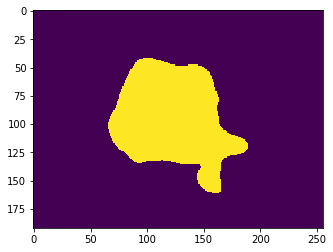

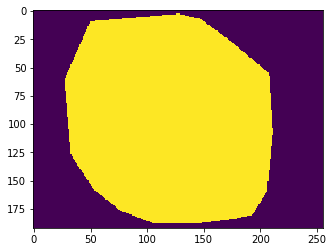

0.7674163818359375  step number is  3400  batch_size is  16
Currently on step 3500
the time is  398.70833799999997 

Avg Jacc is:


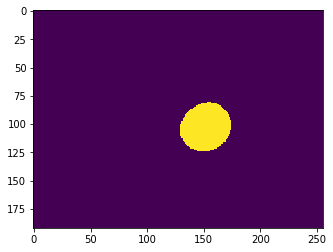

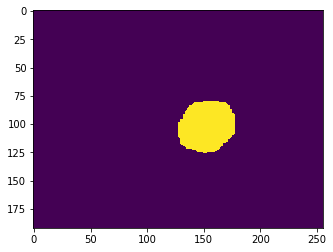

0.7624458899864783  step number is  3500  batch_size is  16
Currently on step 3600
the time is  410.077089 

Avg Jacc is:


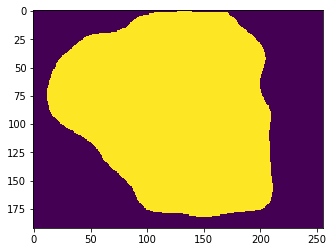

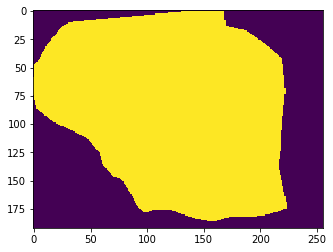

0.7686069781963641  step number is  3600  batch_size is  16
Currently on step 3700
the time is  421.268421 

Avg Jacc is:


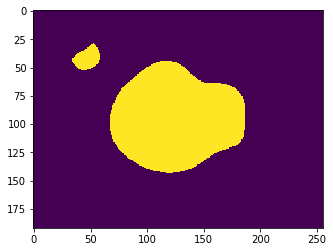

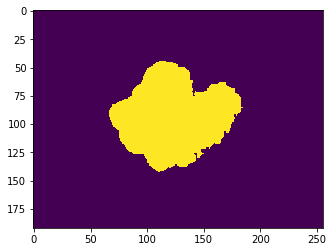

0.7281420194185697  step number is  3700  batch_size is  16
Currently on step 3800
the time is  432.44454 

Avg Jacc is:


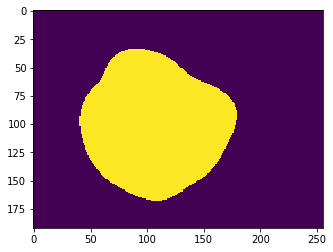

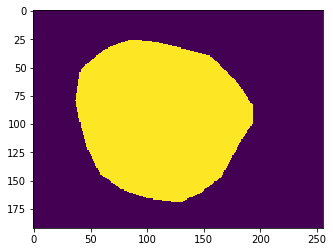

0.7504126915564904  step number is  3800  batch_size is  16
Currently on step 3900
the time is  443.798669 

Avg Jacc is:


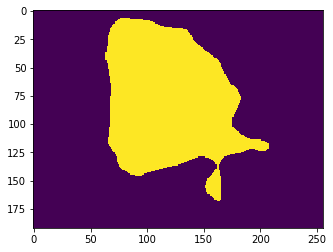

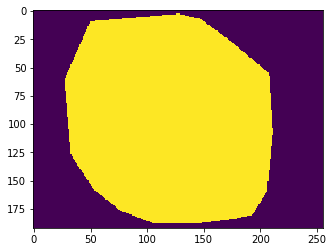

0.7661953265850361  step number is  3900  batch_size is  16
Currently on step 4000
the time is  454.953683 

Avg Jacc is:


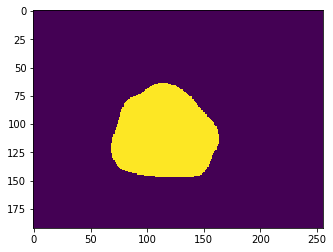

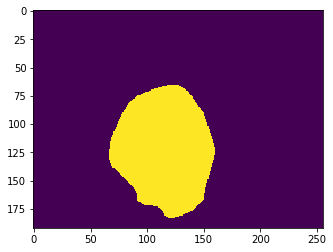

0.7780693641075721  step number is  4000  batch_size is  16
Currently on step 4100
the time is  466.088924 

Avg Jacc is:


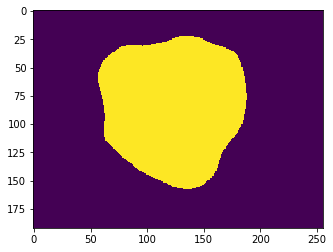

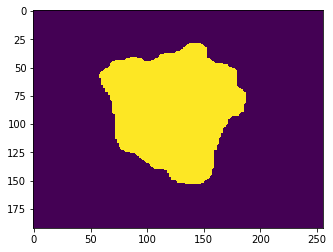

0.7659500122070313  step number is  4100  batch_size is  16
Currently on step 4200
the time is  477.216434 

Avg Jacc is:


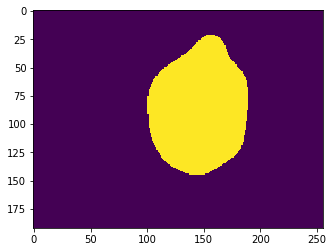

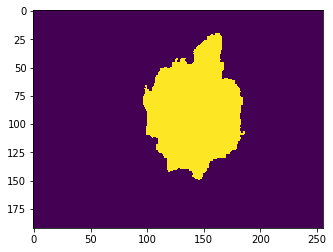

0.7631041306715746  step number is  4200  batch_size is  16
Currently on step 4300
the time is  488.35585599999996 

Avg Jacc is:


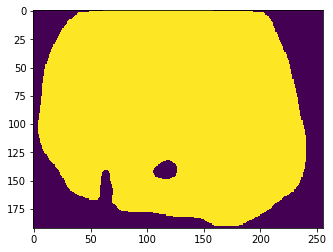

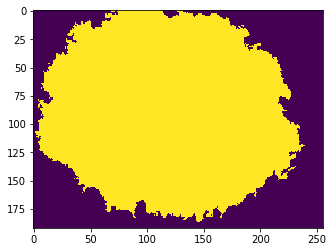

0.7626556396484375  step number is  4300  batch_size is  16
Currently on step 4400
the time is  499.56629000000004 

Avg Jacc is:


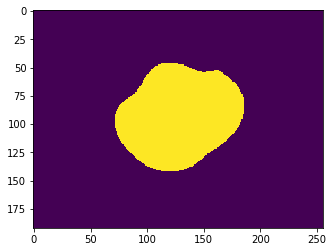

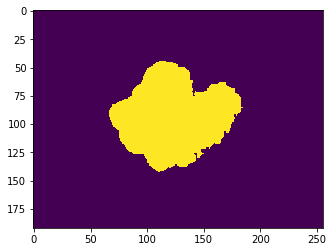

0.7704827528733473  step number is  4400  batch_size is  16
Currently on step 4500
the time is  510.767671 

Avg Jacc is:


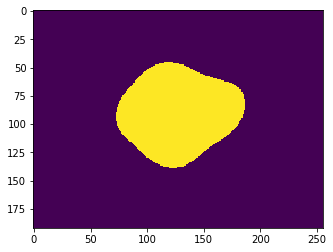

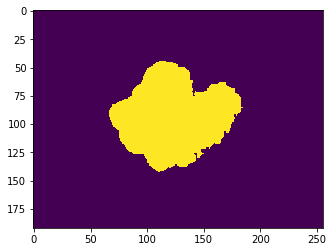

0.765396000788762  step number is  4500  batch_size is  16
Currently on step 4600
the time is  521.91538 

Avg Jacc is:


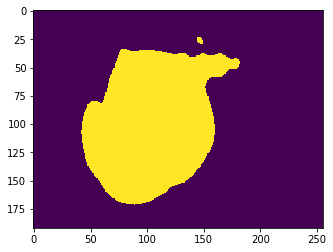

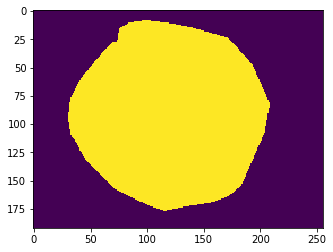

0.7611976036658654  step number is  4600  batch_size is  16
Currently on step 4700
the time is  533.0780990000001 

Avg Jacc is:


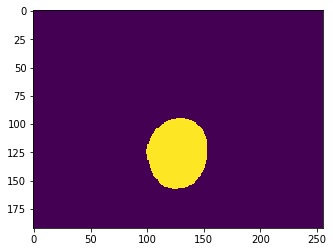

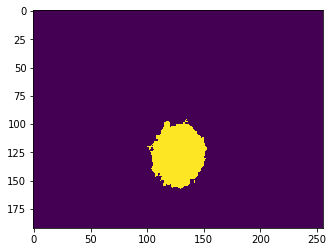

0.7764200063852164  step number is  4700  batch_size is  16
Currently on step 4800
the time is  544.2974280000001 

Avg Jacc is:


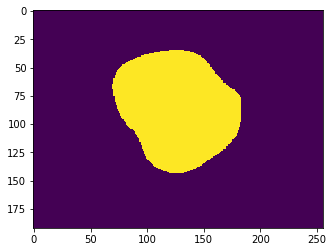

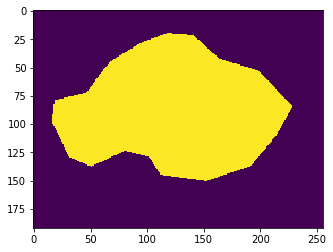

0.7462312551645133  step number is  4800  batch_size is  16
Currently on step 4900
the time is  555.4813160000001 

Avg Jacc is:


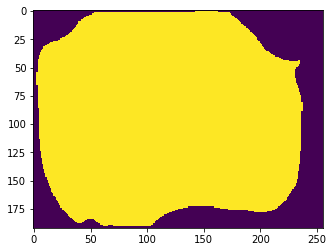

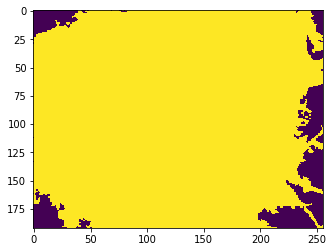

0.7520885760967548  step number is  4900  batch_size is  16
Currently on step 5000
the time is  566.656024 

Avg Jacc is:


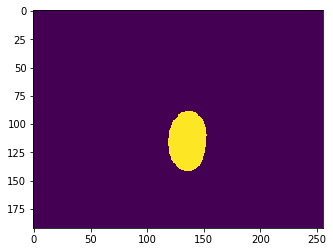

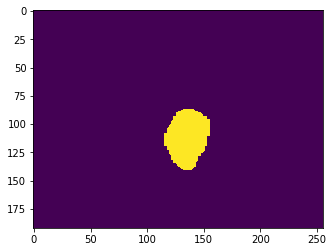

0.7610009413499098  step number is  5000  batch_size is  16
Currently on step 5100
the time is  577.803617 

Avg Jacc is:


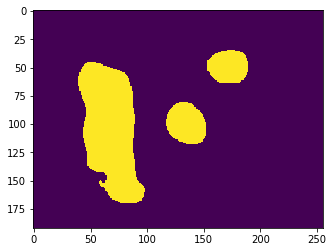

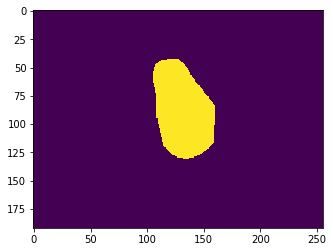

0.7745832589956431  step number is  5100  batch_size is  16
Currently on step 5200
the time is  588.976256 

Avg Jacc is:


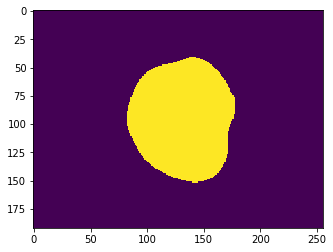

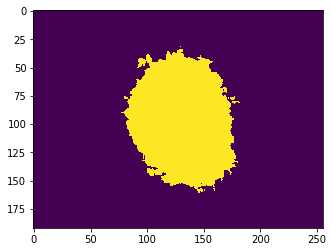

0.7687123225285457  step number is  5200  batch_size is  16
Currently on step 5300
the time is  600.166725 

Avg Jacc is:


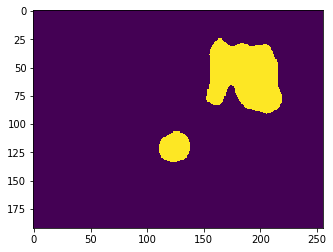

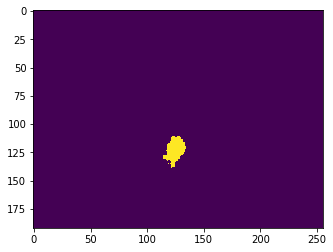

0.758645747258113  step number is  5300  batch_size is  16
Currently on step 5400
the time is  611.5156330000001 

Avg Jacc is:


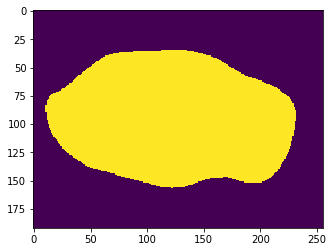

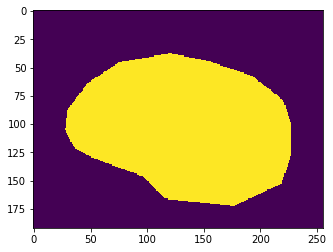

0.7586002056415264  step number is  5400  batch_size is  16
Currently on step 5500
the time is  622.654807 

Avg Jacc is:


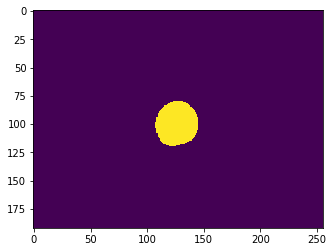

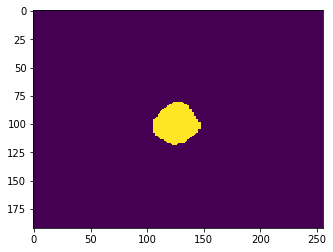

0.7750255878155048  step number is  5500  batch_size is  16
Currently on step 5600
the time is  633.8463770000001 

Avg Jacc is:


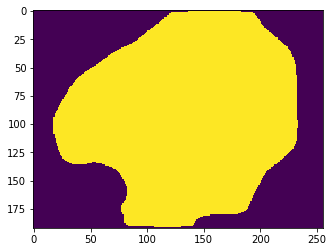

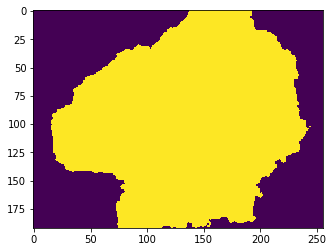

0.7613565298227164  step number is  5600  batch_size is  16
Currently on step 5700
the time is  645.0670530000001 

Avg Jacc is:


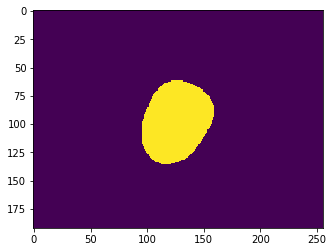

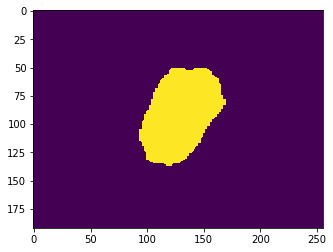

0.7612512441781851  step number is  5700  batch_size is  16
Currently on step 5800
the time is  656.276378 

Avg Jacc is:


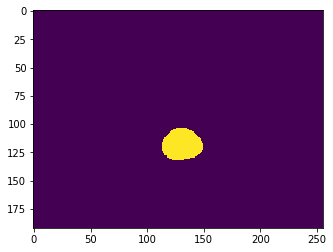

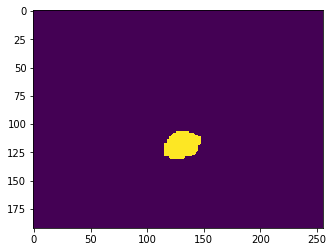

0.7646453857421875  step number is  5800  batch_size is  16
Currently on step 5900
the time is  667.6623350000001 

Avg Jacc is:


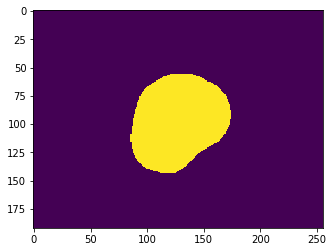

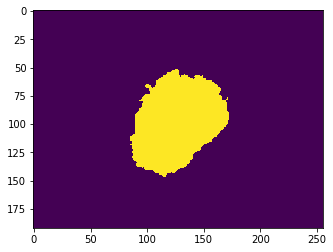

0.7518309959998497  step number is  5900  batch_size is  16
Currently on step 6000
the time is  678.866977 

Avg Jacc is:


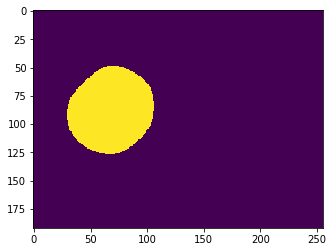

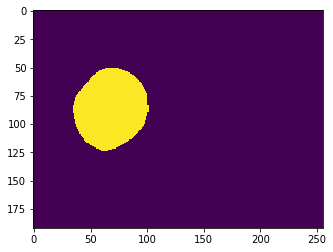

0.7651702293982873  step number is  6000  batch_size is  16
Currently on step 6100
the time is  689.9692590000001 

Avg Jacc is:


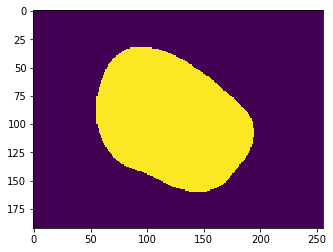

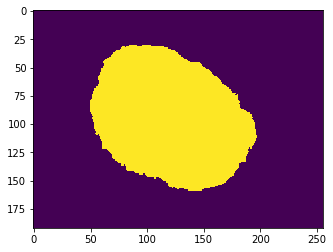

0.7712153508112981  step number is  6100  batch_size is  16
Currently on step 6200
the time is  701.1501780000001 

Avg Jacc is:


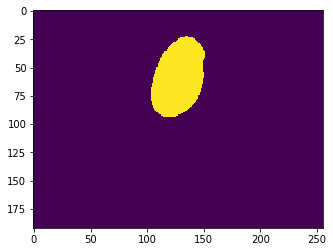

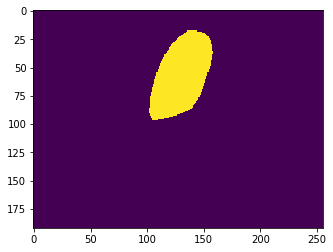

0.7710996774526743  step number is  6200  batch_size is  16
Currently on step 6300
the time is  712.3511970000001 

Avg Jacc is:


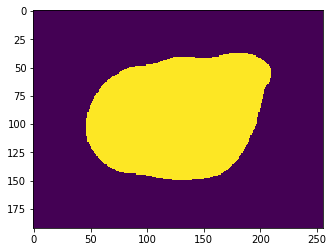

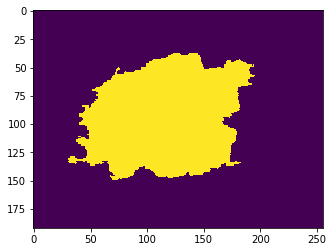

0.767681884765625  step number is  6300  batch_size is  16
Currently on step 6400
the time is  723.519712 

Avg Jacc is:


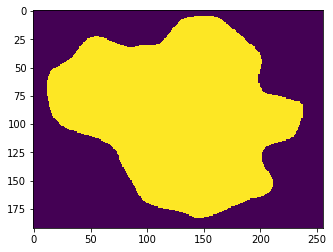

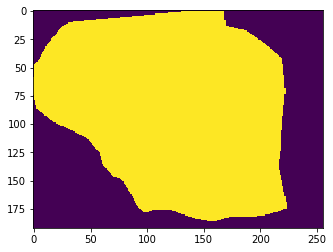

0.7611770629882812  step number is  6400  batch_size is  16
Currently on step 6500
the time is  734.7457830000001 

Avg Jacc is:


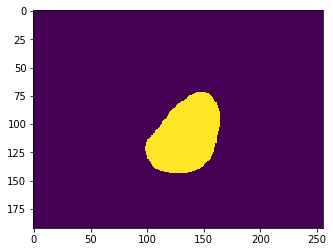

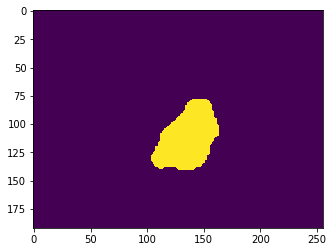

0.7629707336425782  step number is  6500  batch_size is  16
Currently on step 6600
the time is  745.8816760000001 

Avg Jacc is:


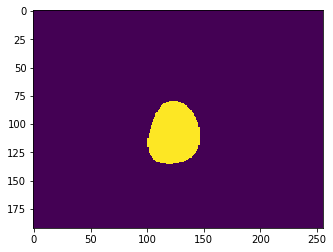

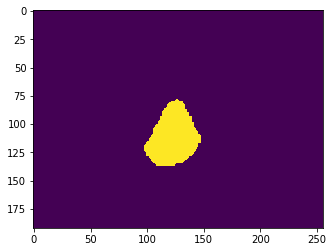

0.7532951941856971  step number is  6600  batch_size is  16
Currently on step 6700
the time is  757.048794 

Avg Jacc is:


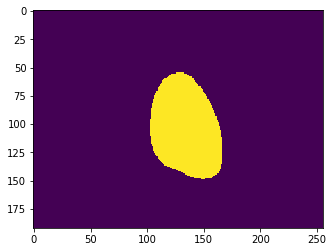

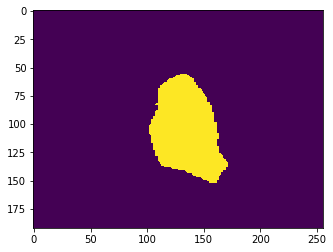

0.7704822246844952  step number is  6700  batch_size is  16
Currently on step 6800
the time is  768.164084 

Avg Jacc is:


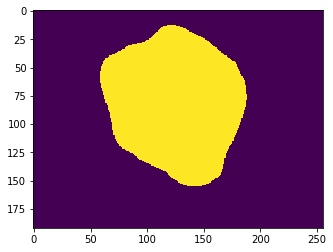

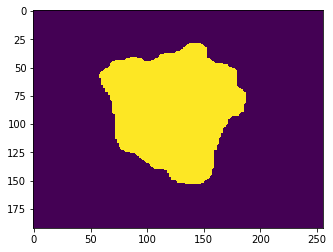

0.776885986328125  step number is  6800  batch_size is  16
Currently on step 6900
the time is  779.270468 

Avg Jacc is:


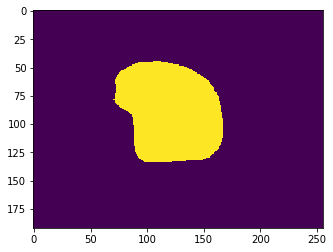

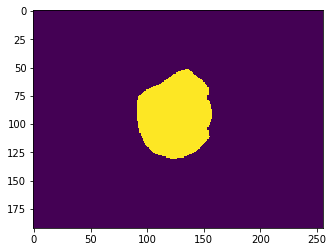

0.767886235163762  step number is  6900  batch_size is  16
Currently on step 7000
the time is  790.6053730000001 

Avg Jacc is:


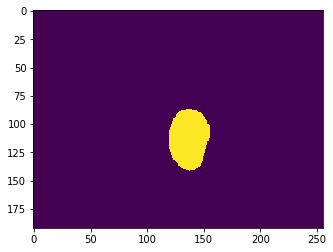

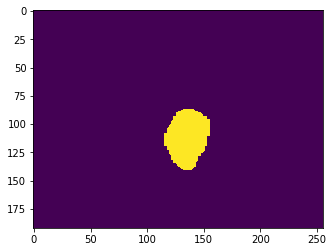

0.7719463641826924  step number is  7000  batch_size is  16
Currently on step 7100
the time is  801.792136 

Avg Jacc is:


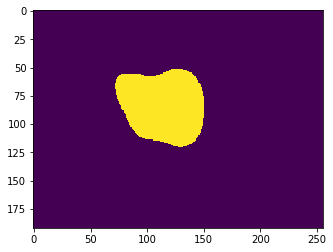

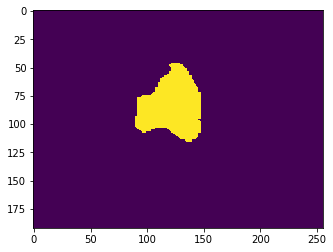

0.7755020141601563  step number is  7100  batch_size is  16
Currently on step 7200
the time is  812.9936680000001 

Avg Jacc is:


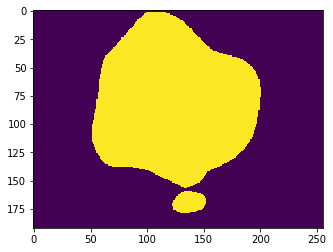

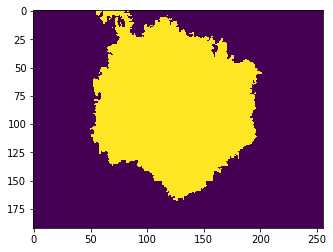

0.7538692767803485  step number is  7200  batch_size is  16
Currently on step 7300
the time is  824.167821 

Avg Jacc is:


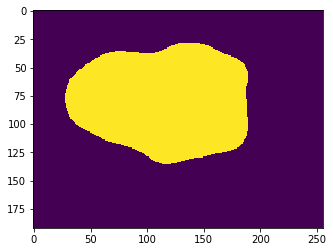

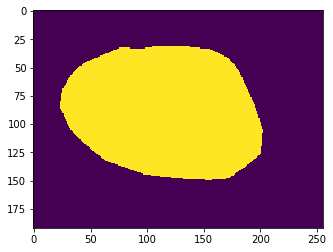

0.7672862126277044  step number is  7300  batch_size is  16
Currently on step 7400
the time is  835.3231800000001 

Avg Jacc is:


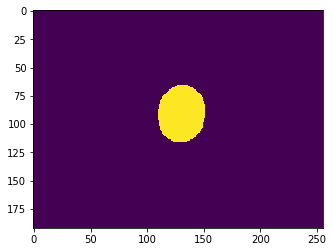

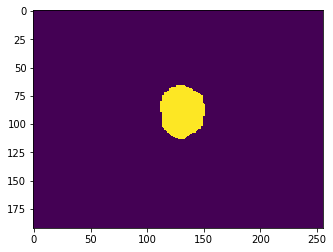

0.7679498525766226  step number is  7400  batch_size is  16
Currently on step 7500
the time is  846.351133 

Avg Jacc is:


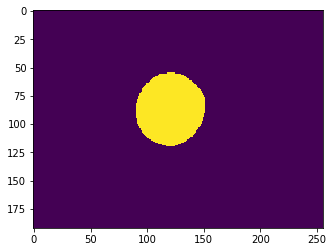

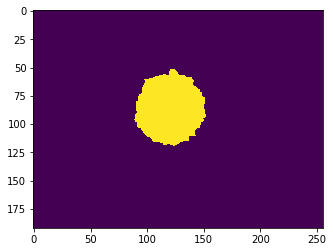

0.7623706524188701  step number is  7500  batch_size is  16
Currently on step 7600
the time is  857.5178030000001 

Avg Jacc is:


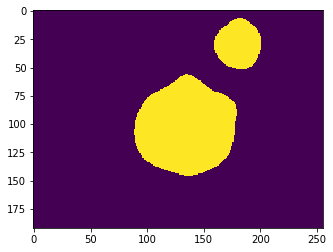

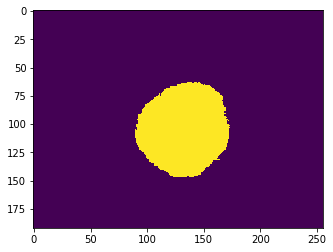

0.7661797743577223  step number is  7600  batch_size is  16
Currently on step 7700
the time is  868.715263 

Avg Jacc is:


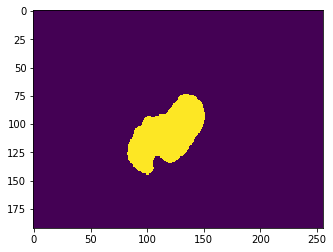

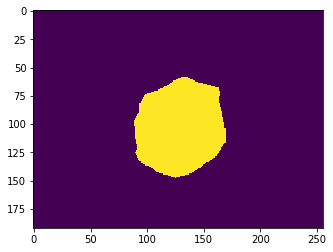

0.7596595764160157  step number is  7700  batch_size is  16
Currently on step 7800
the time is  879.8217820000001 

Avg Jacc is:


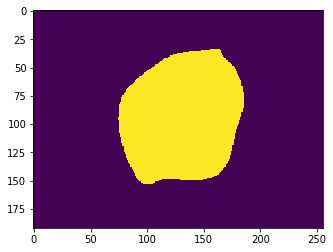

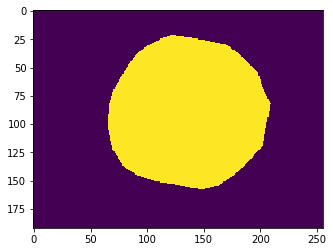

0.747710946890024  step number is  7800  batch_size is  16
Currently on step 7900
the time is  890.950278 

Avg Jacc is:


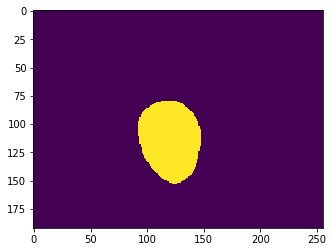

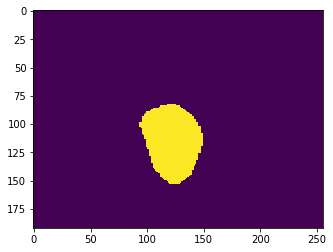

0.7549976055438702  step number is  7900  batch_size is  16
Currently on step 8000
the time is  902.1362700000001 

Avg Jacc is:


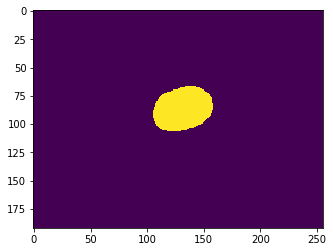

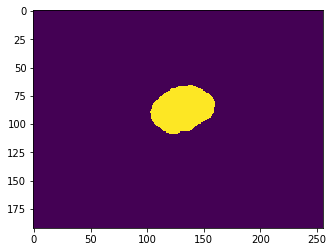

0.7759875957782452  step number is  8000  batch_size is  16
Currently on step 8100
the time is  913.2677130000001 

Avg Jacc is:


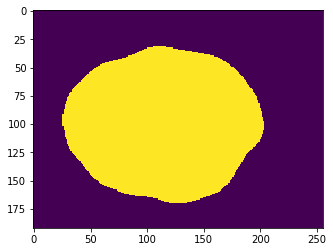

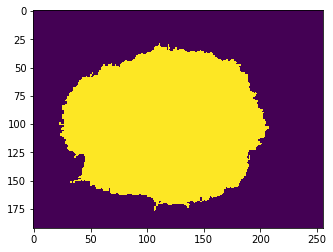

0.7717059795673077  step number is  8100  batch_size is  16
Currently on step 8200
the time is  924.57762 

Avg Jacc is:


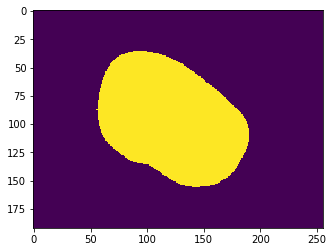

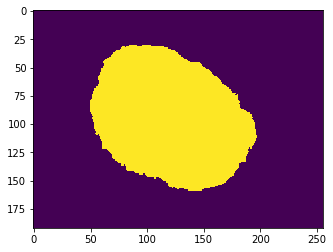

0.7558648916391226  step number is  8200  batch_size is  16
Currently on step 8300
the time is  935.8319660000001 

Avg Jacc is:


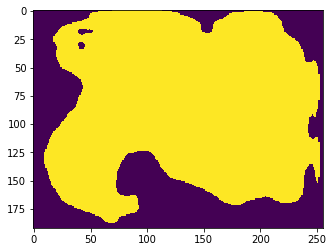

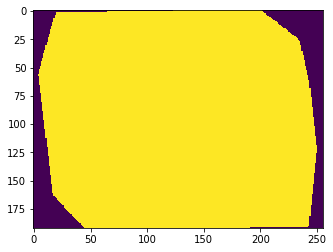

0.7605708195612981  step number is  8300  batch_size is  16
Currently on step 8400
the time is  947.029792 

Avg Jacc is:


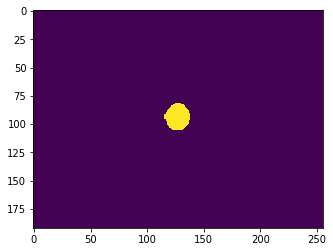

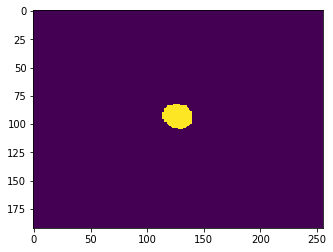

0.7476725651667668  step number is  8400  batch_size is  16
Currently on step 8500
the time is  958.1961550000001 

Avg Jacc is:


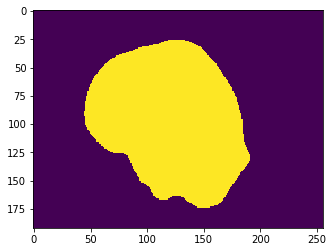

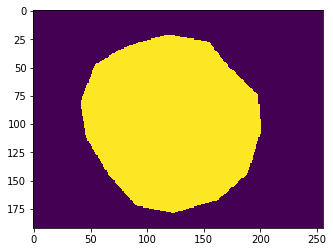

0.7754582331730769  step number is  8500  batch_size is  16
Currently on step 8600
the time is  969.4937100000001 

Avg Jacc is:


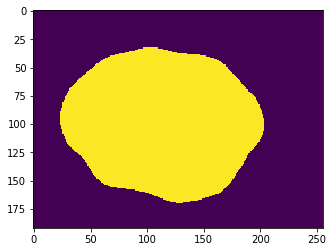

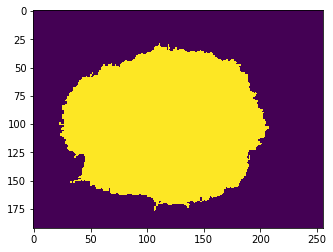

0.7729015643780048  step number is  8600  batch_size is  16
Currently on step 8700
the time is  980.633237 

Avg Jacc is:


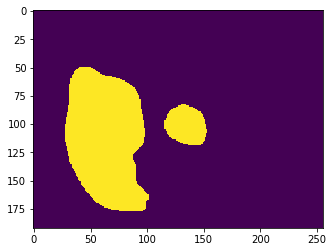

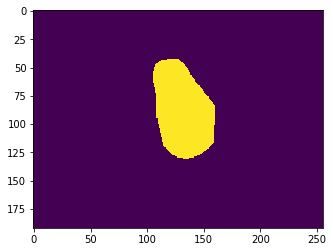

0.7751367422250601  step number is  8700  batch_size is  16
Currently on step 8800
the time is  991.785749 

Avg Jacc is:


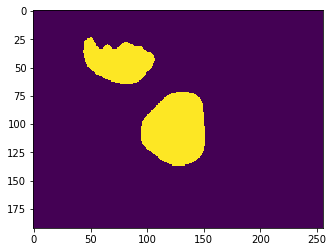

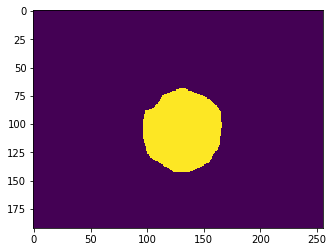

0.7796428973858173  step number is  8800  batch_size is  16
Currently on step 8900
the time is  1002.886852 

Avg Jacc is:


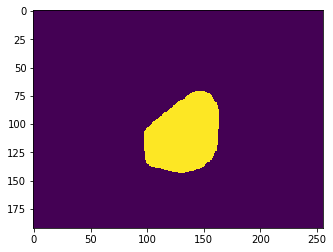

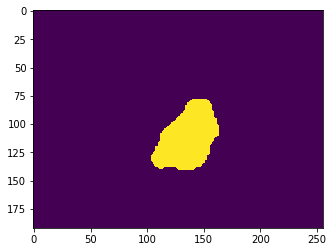

0.7580947875976562  step number is  8900  batch_size is  16
Currently on step 9000
the time is  1014.034211 

Avg Jacc is:


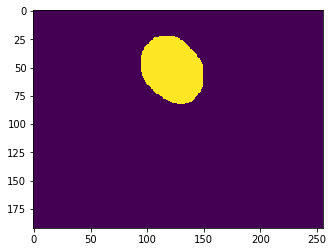

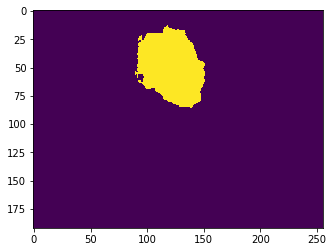

0.7611441979041467  step number is  9000  batch_size is  16
Currently on step 9100
the time is  1025.196317 

Avg Jacc is:


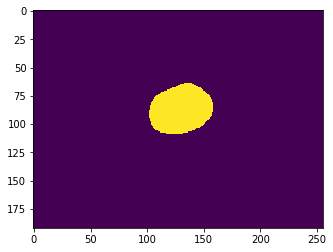

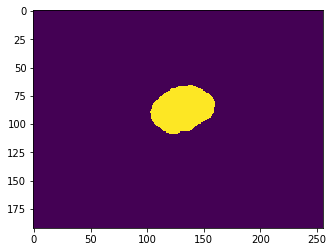

0.7530737069936899  step number is  9100  batch_size is  16
Currently on step 9200
the time is  1036.330692 

Avg Jacc is:


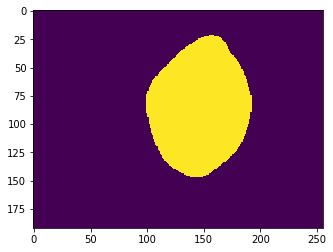

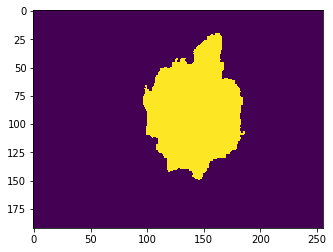

0.7719147902268629  step number is  9200  batch_size is  16
Currently on step 9300
the time is  1047.557217 

Avg Jacc is:


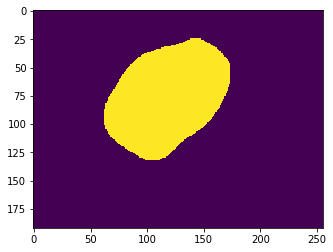

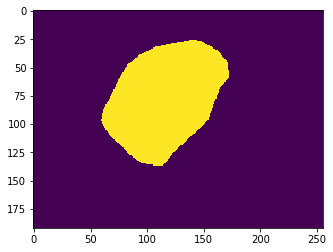

0.7588773874136118  step number is  9300  batch_size is  16
Currently on step 9400
the time is  1058.697598 

Avg Jacc is:


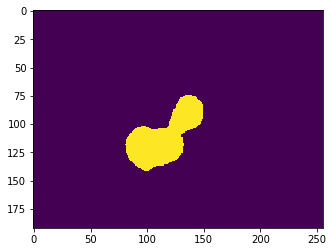

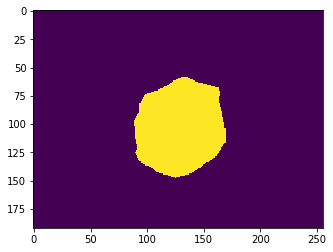

0.7289467444786659  step number is  9400  batch_size is  16
Currently on step 9500
the time is  1069.868348 

Avg Jacc is:


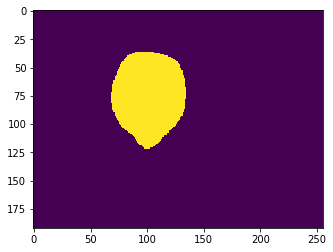

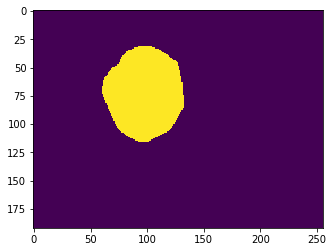

0.7663014925443209  step number is  9500  batch_size is  16
Currently on step 9600
the time is  1081.007566 

Avg Jacc is:


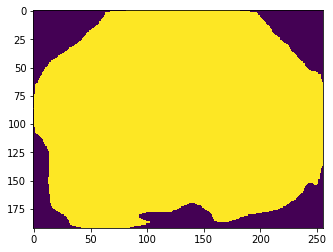

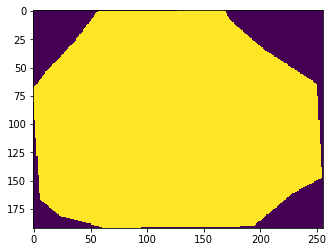

0.7720579880934495  step number is  9600  batch_size is  16
Currently on step 9700
the time is  1092.178208 

Avg Jacc is:


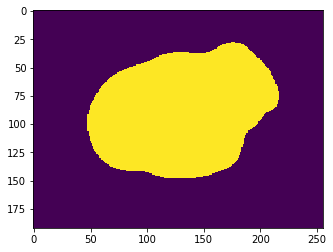

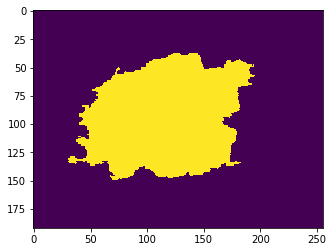

0.7621078491210938  step number is  9700  batch_size is  16
Currently on step 9800
the time is  1103.352348 

Avg Jacc is:


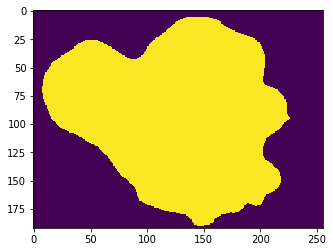

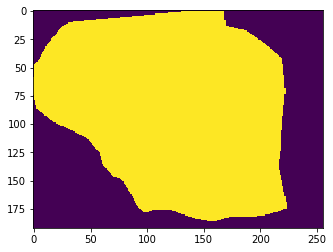

0.7604331383338341  step number is  9800  batch_size is  16
Currently on step 9900
the time is  1114.464545 

Avg Jacc is:


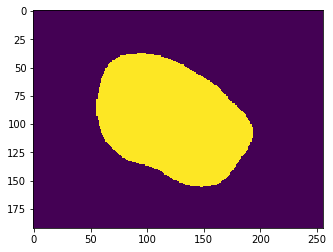

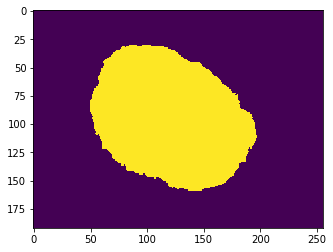

0.7660619882436899  step number is  9900  batch_size is  16
Currently on step 10000
the time is  1125.689787 

Avg Jacc is:


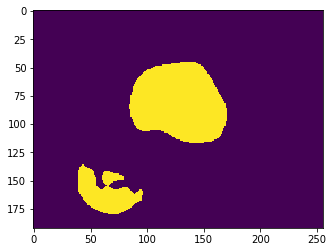

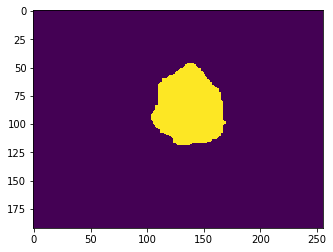

0.7715969966008113  step number is  10000  batch_size is  16
Currently on step 10100
the time is  1136.8421449999998 

Avg Jacc is:


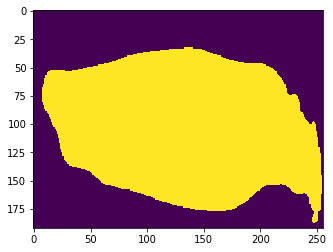

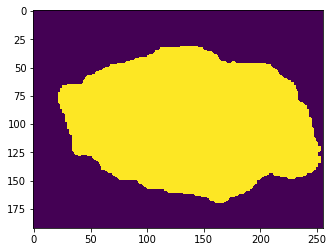

0.761681894155649  step number is  10100  batch_size is  16
Currently on step 10200
the time is  1148.164156 

Avg Jacc is:


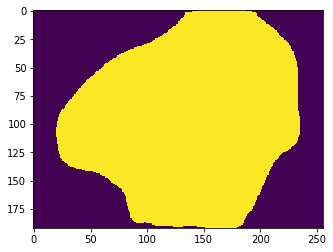

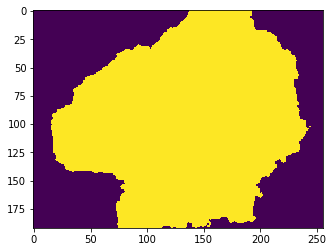

0.7621927114633413  step number is  10200  batch_size is  16
Currently on step 10300
the time is  1159.305966 

Avg Jacc is:


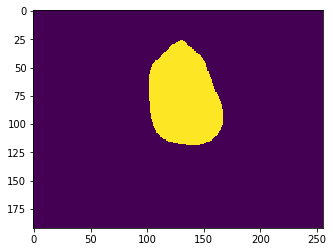

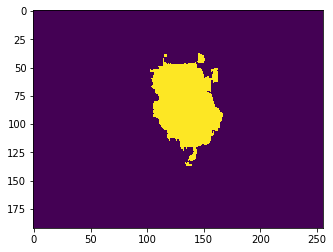

0.7679858867938701  step number is  10300  batch_size is  16
Currently on step 10400
the time is  1170.5215369999999 

Avg Jacc is:


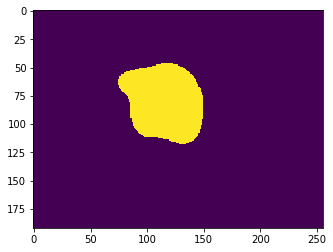

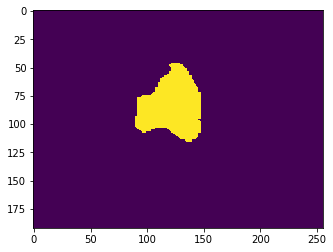

0.7543724646935096  step number is  10400  batch_size is  16


In [79]:
steps = 10500
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
            ####use with cross entropy####
            #pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            #true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)
            
        


            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect_o  #think this has an error
            jacc_o = intersect_o/union_o
            
            
            J_out_t = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out_t[0])/J_out_t[0].shape[0]
            j_train += [J_train]
            
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
           
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
            #print("intersection is", J_out[2], "union is", J_out[3], "\n", "y_pred is ", J_out[4], "true is ", J_out[5], "sum_pred =",  J_out[6], "sum_true", J_out[7])
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")
        
        

In [82]:
J_out[1].shape

(130, 192, 256)

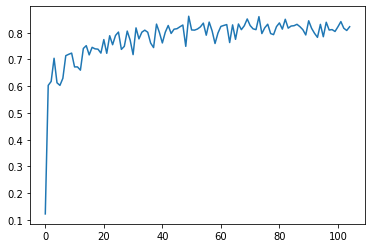

In [83]:
j_train = np.array(j_train)
j_test = np.array(j_test)
plt.plot(j_train)

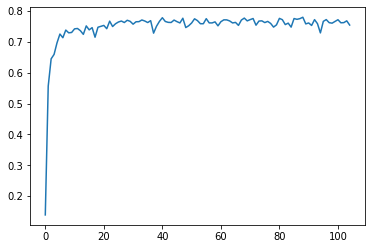

In [84]:

plt.plot(j_test)

(array([ 1.,  1.,  3.,  4.,  4., 10., 10., 30., 33., 34.]),
 array([0.13434054, 0.21574   , 0.29713944, 0.3785389 , 0.45993835,
        0.5413378 , 0.6227372 , 0.70413667, 0.78553617, 0.8669356 ,
        0.94833505], dtype=float32),
 <a list of 10 Patch objects>)

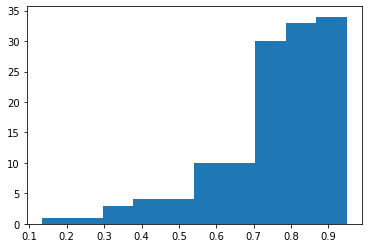

In [85]:
plt.hist(J_out[0])

(array([1., 0., 4., 1., 0., 0., 1., 5., 2., 2.]),
 array([0.68643636, 0.70985204, 0.7332677 , 0.7566834 , 0.7800991 ,
        0.8035148 , 0.82693046, 0.85034615, 0.87376183, 0.8971775 ,
        0.9205932 ], dtype=float32),
 <a list of 10 Patch objects>)

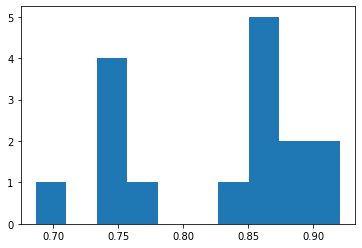

In [86]:
plt.hist(J_out_t[0])

In [87]:
#failure rate on test set:
fails = 0
for a in J_out[0]:
  if a < 0.65:
    fails += 1
    
rate = fails/J_out[0].shape[0]
rate

0.2076923076923077

## Great Job!

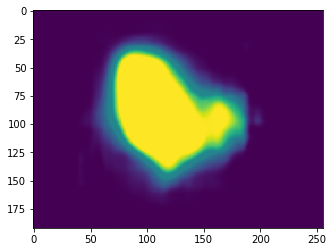

In [88]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [89]:
pigs.shape

(28, 192, 256, 3)

In [90]:
pred_pigment[0].shape

(28, 192, 256)

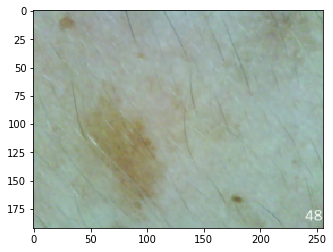

In [91]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
def visual_progress():

  mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
  for i in range(28):
    mask[:,:,0] = np.around(pred_pigment[0][i])
    mask[:,:,1] = np.around(pred_pigment[0][i])
    mask[:,:,2] = np.around(pred_pigment[0][i])


    image = pigs[i]
    notmask = 1- mask
    image2 = image*mask
    image1 = image*(1- mask)

    image2_avgr = np.average(image2[:,:,0], weights = mask[:,:,0])
    image2_avgg = np.average(image2[:,:,1], weights = mask[:,:,1]) 
    image2_avgb = np.average(image2[:,:,2], weights = mask[:,:,2])

    image1_avgr = np.average(image1[:,:,0], weights = notmask[:,:,0])
    image1_avgg = np.average(image1[:,:,1], weights = notmask[:,:,1]) 
    image1_avgb = np.average(image1[:,:,2], weights = notmask[:,:,2])

    image2_avg = np.zeros(image2.shape)
    image1_avg = np.zeros(image1.shape)
    image2_avg[:,:,0] = image2_avgr
    image2_avg[:,:,1] = image2_avgg
    image2_avg[:,:,2] = image2_avgb

    image1_avg[:,:,0] = image1_avgr
    image1_avg[:,:,1] = image1_avgg
    image1_avg[:,:,2] = image1_avgb
#mask = 1-mask
#mask = mask.astype(int)
    plt.imshow(image2_avg)
    plt.show()
  
#image[mask] = 0

    plt.imshow(image1_avg)
    plt.show()

    plt.imshow(image2)
    plt.show()
    plt.imshow(image1)
    plt.show()

    print("next day..\n")
  return()

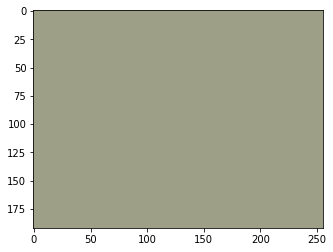

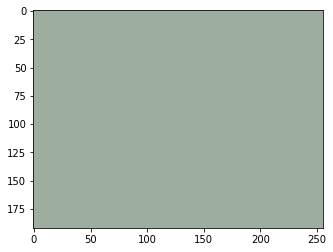

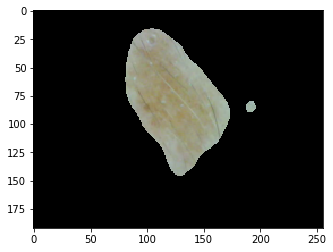

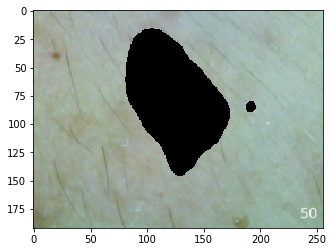

next day..



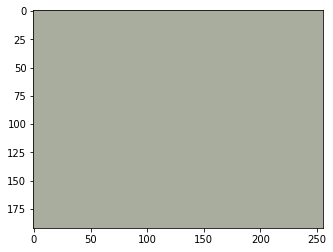

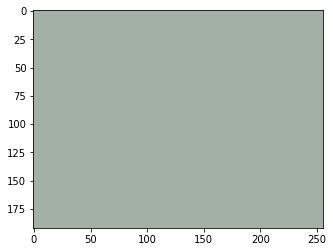

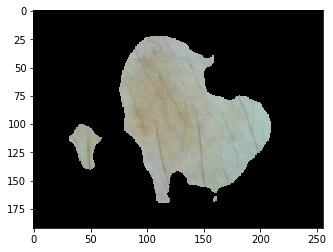

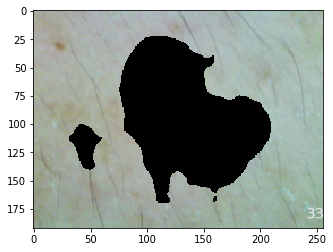

next day..



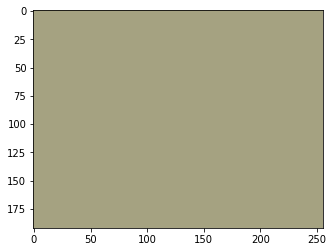

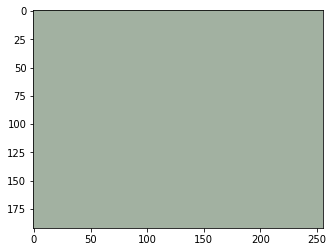

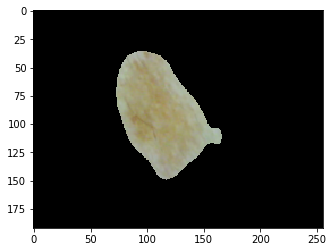

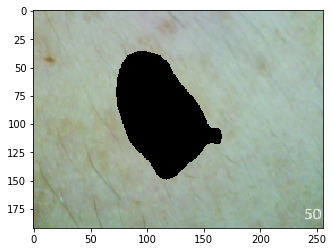

next day..



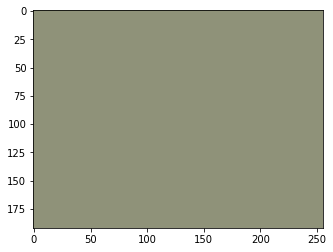

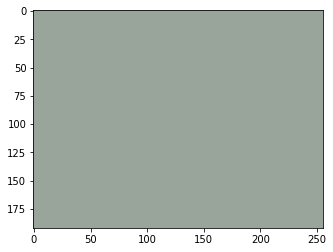

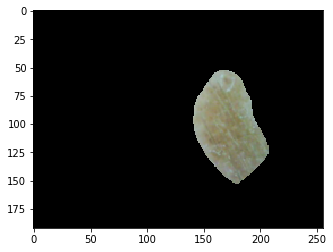

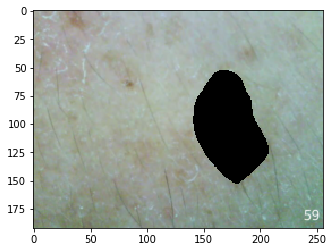

next day..



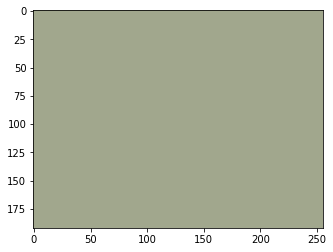

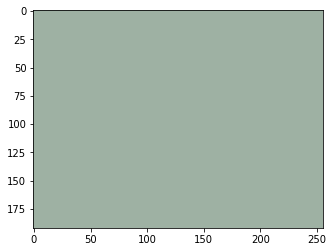

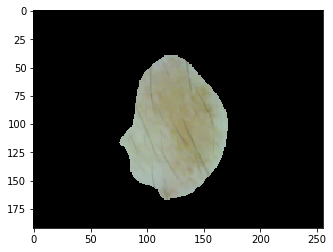

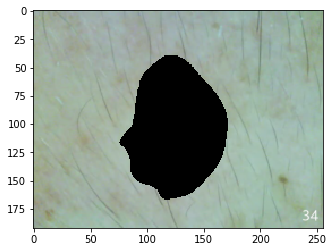

next day..



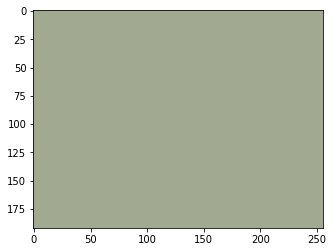

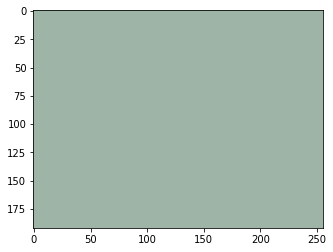

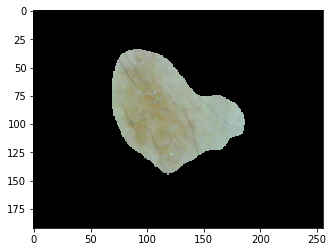

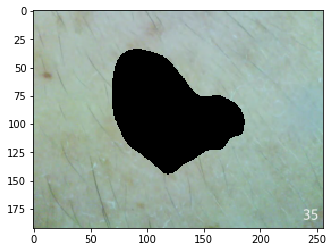

next day..



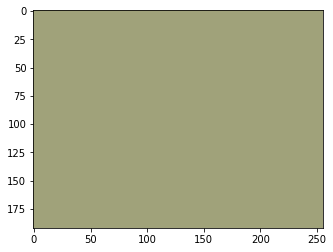

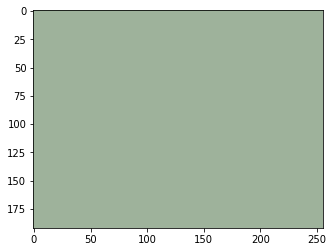

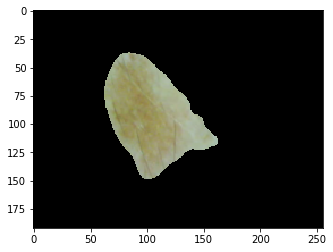

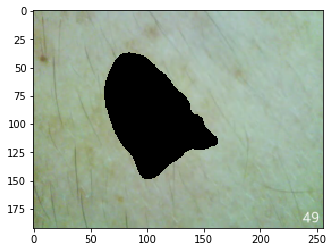

next day..



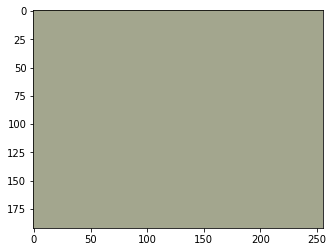

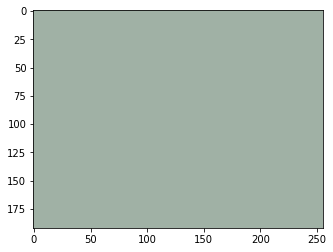

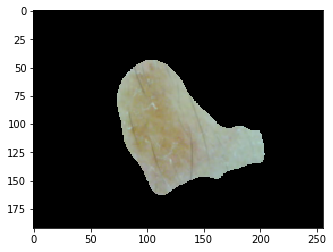

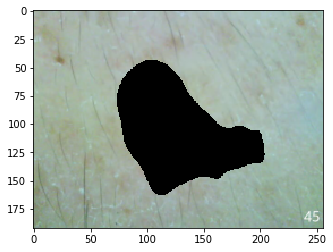

next day..



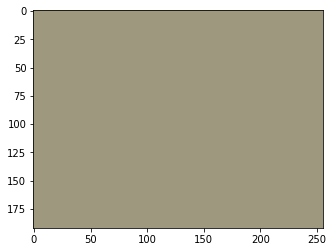

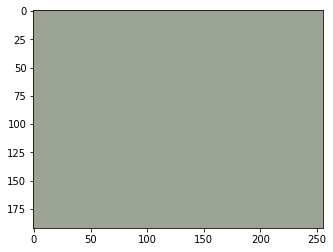

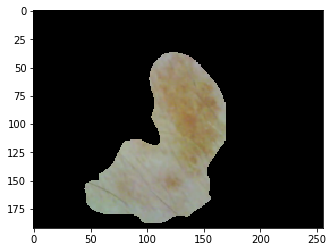

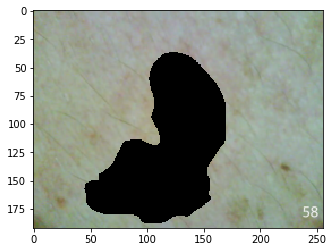

next day..



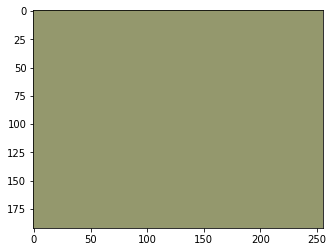

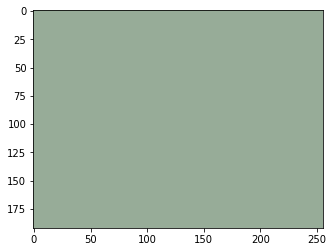

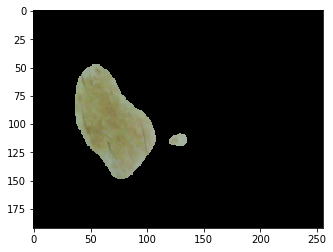

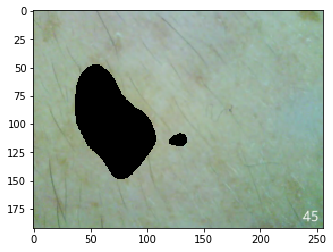

next day..



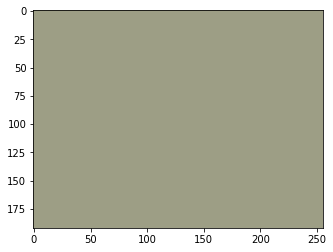

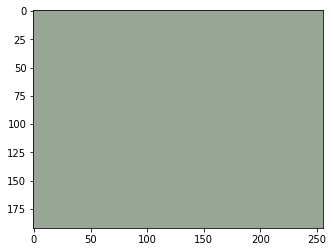

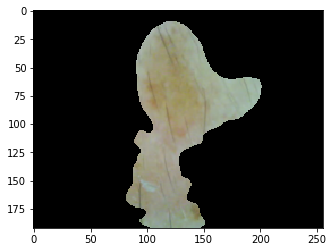

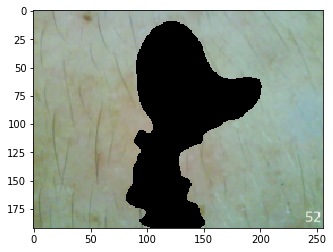

next day..



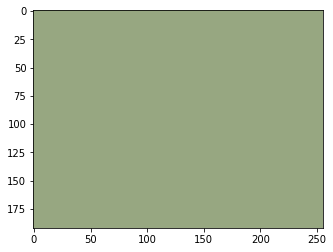

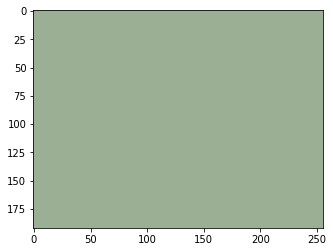

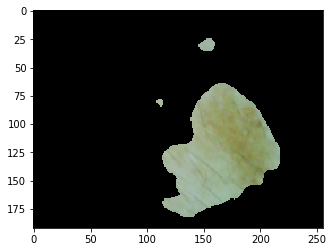

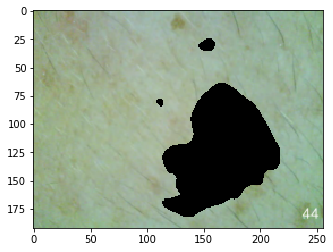

next day..



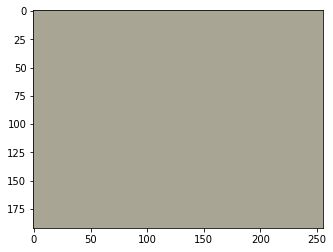

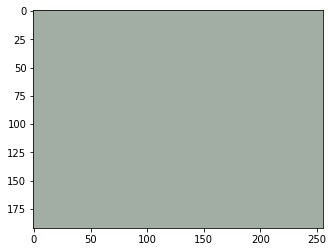

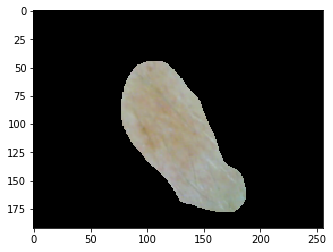

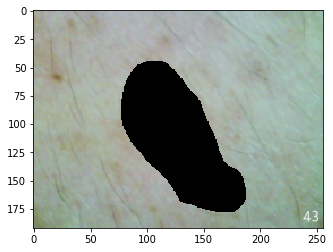

next day..



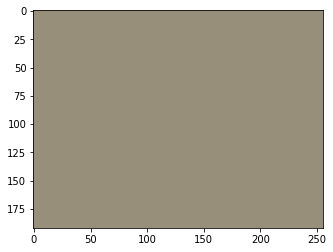

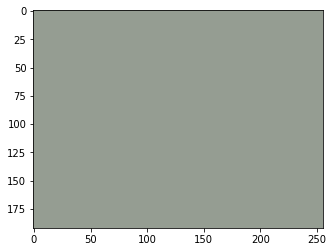

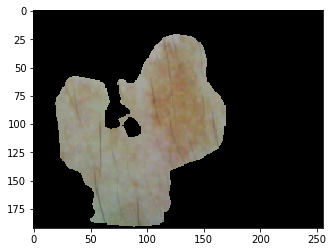

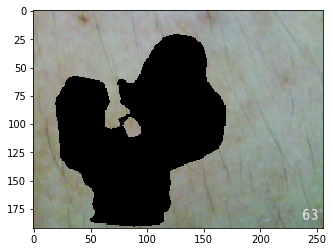

next day..



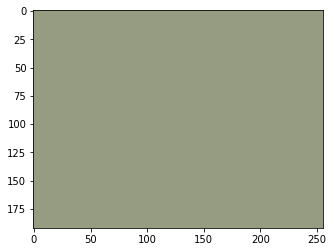

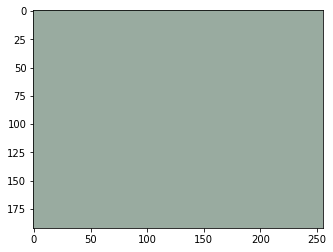

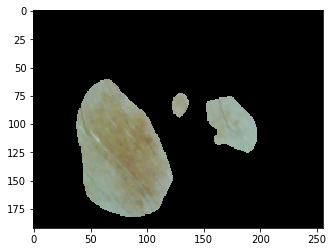

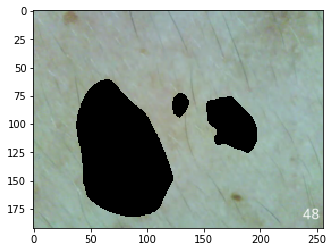

next day..



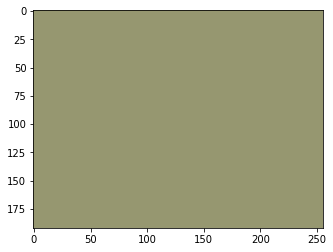

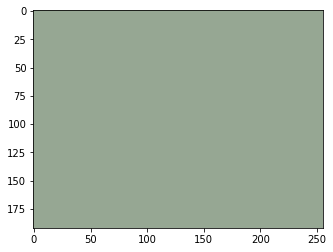

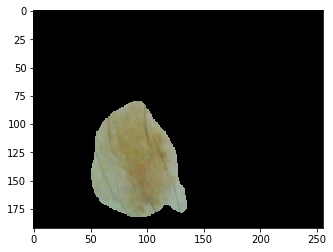

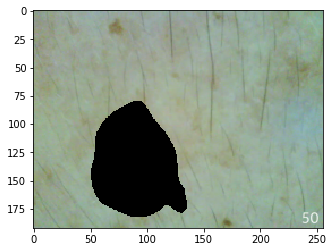

next day..



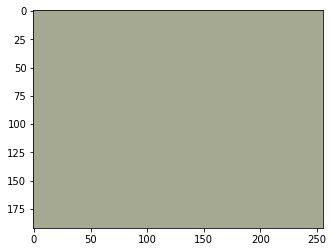

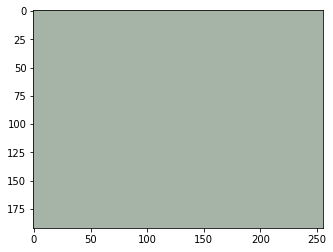

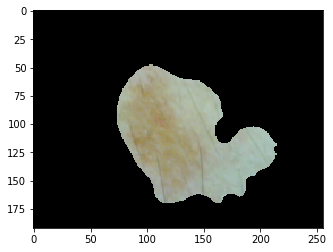

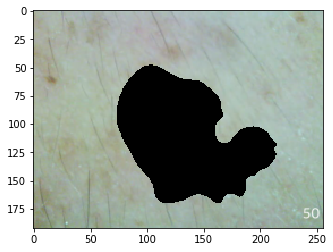

next day..



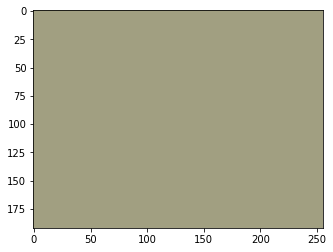

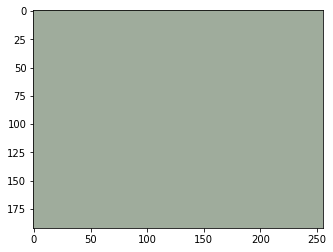

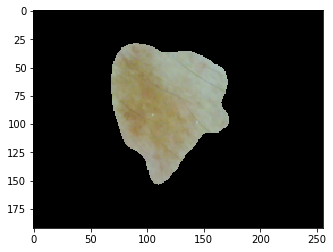

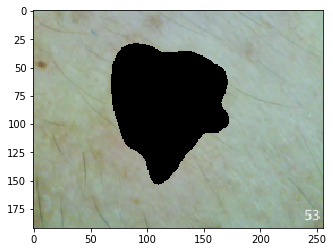

next day..



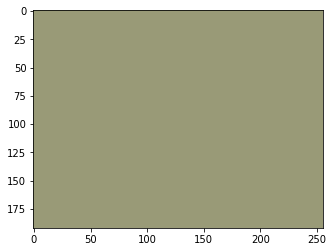

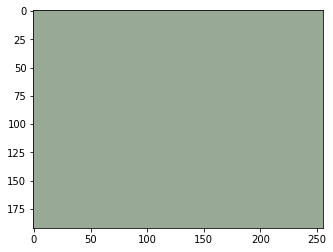

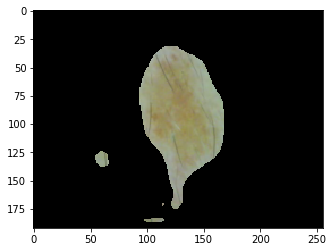

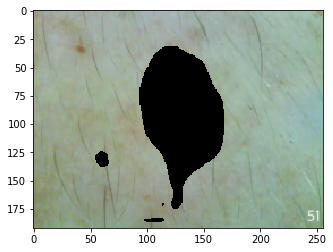

next day..



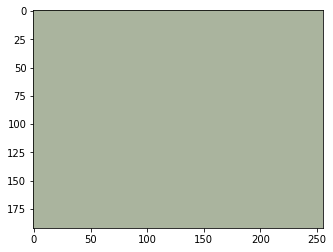

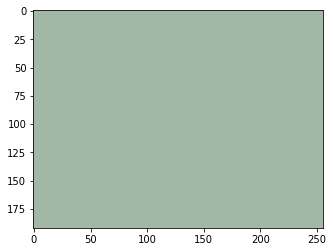

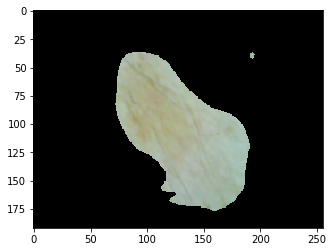

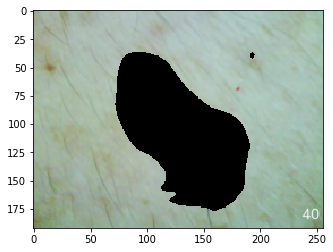

next day..



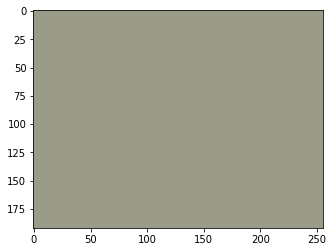

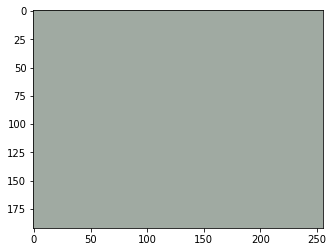

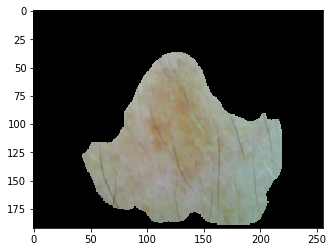

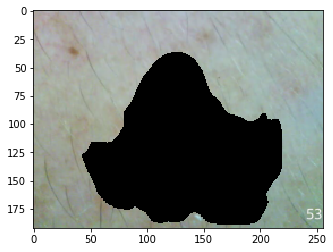

next day..



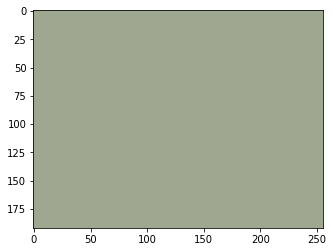

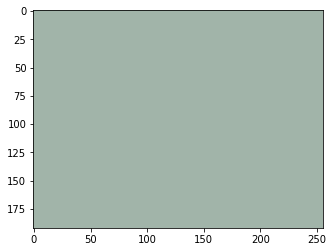

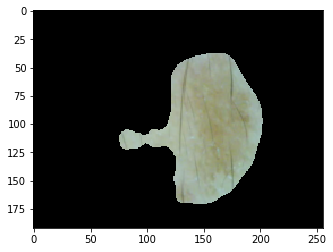

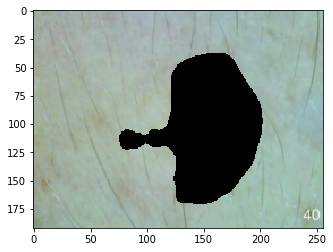

next day..



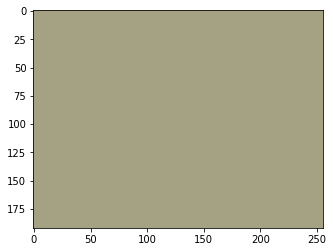

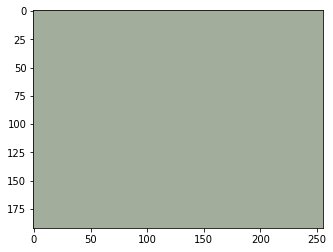

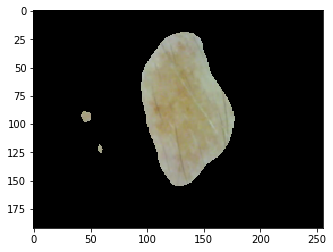

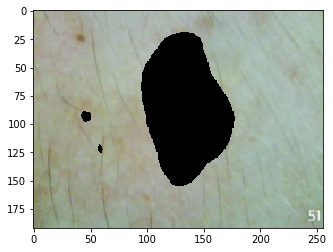

next day..



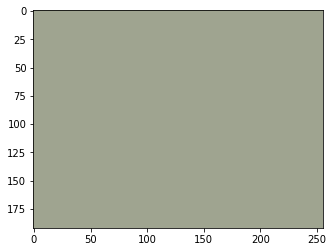

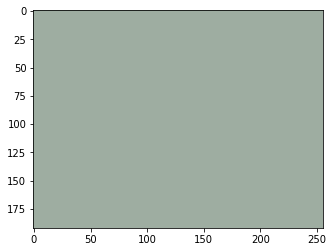

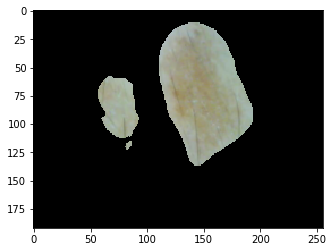

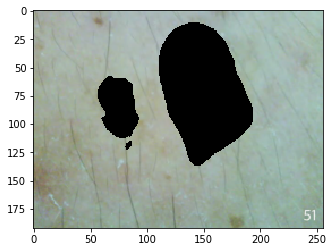

next day..



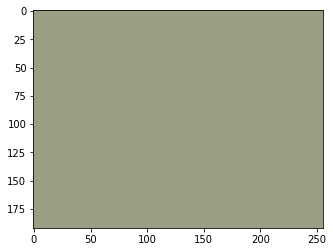

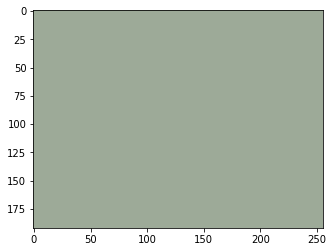

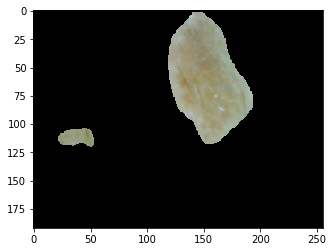

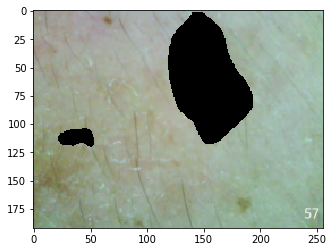

next day..



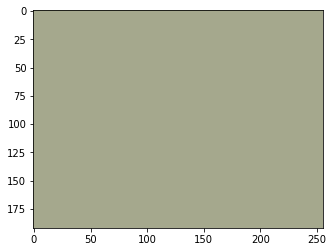

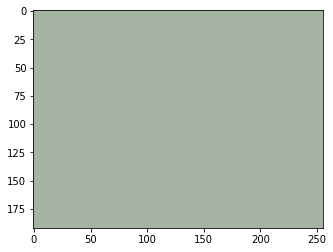

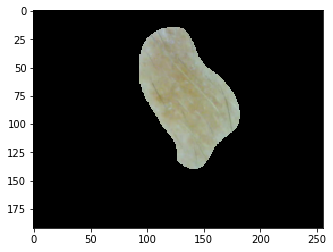

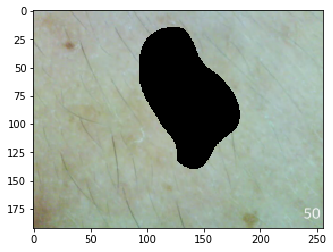

next day..



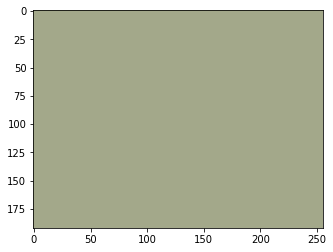

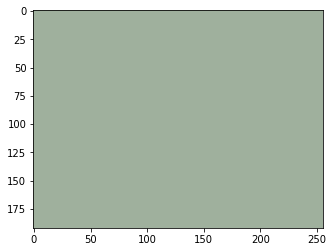

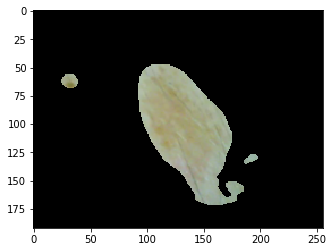

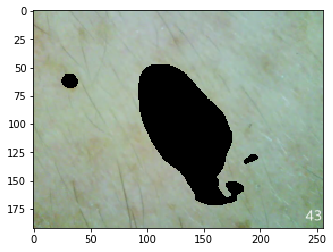

next day..



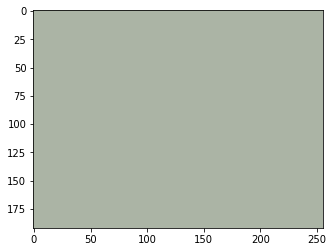

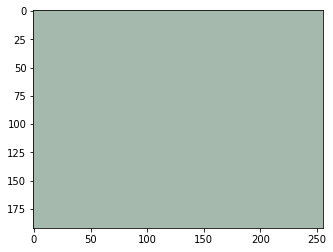

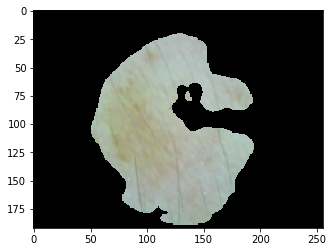

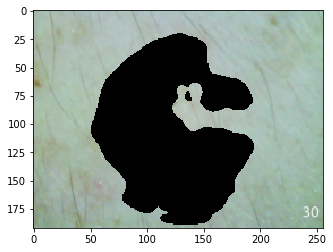

next day..



()

In [96]:
visual_progress()

In [0]:
def measure_progress(pigs,masks):  ##changed from blue to blue - red
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1) - imagen[:,:,0].reshape(-1) 
        blue_pig = imagep[:,:,2].reshape(-1) - imagep[:,:,0].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,0].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,0].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [102]:
J_out[1].shape

(130, 192, 256)

In [103]:
pigmented

array([-18.15950989,  -9.0319024 , -29.16497184, -17.1901346 ,
       -16.96259127, -14.15859993, -30.7019758 , -18.24233045,
       -26.27447316, -31.00580948, -19.19269387, -18.76524488,
       -17.08135034, -23.52869884, -15.03209357, -28.91326734,
       -16.74675919, -27.65138368, -25.34660024, -10.86052913,
       -15.44543519, -11.21750912, -27.5314898 , -12.46780945,
       -18.37541789, -19.52800709, -19.97308542,  -6.45880252])

In [104]:
normal

array([ 2.91889495,  2.91754032, -0.63641015,  1.68520745,  4.690427  ,
        9.22120951, -3.12427523,  4.96388744, -5.89889945,  1.88836638,
       -2.624065  , -5.76095222,  1.15711983, -2.77832797,  6.67226686,
       -2.43692227,  1.497141  , -2.53596724, -1.44531437,  3.64701765,
        2.38874424,  7.994979  , -5.77586352,  3.00323995, -4.31148234,
       -1.57758352, -1.33224999,  6.82146472])

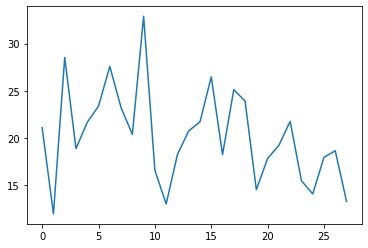

In [105]:
plt.plot(normal - pigmented)

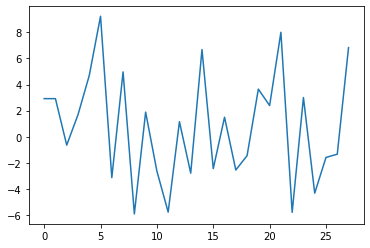

In [106]:
plt.plot(normal)

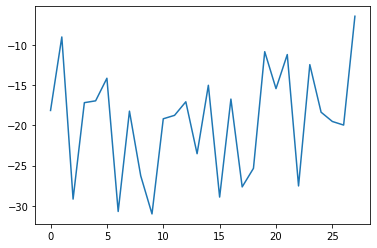

In [107]:
plt.plot(pigmented)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


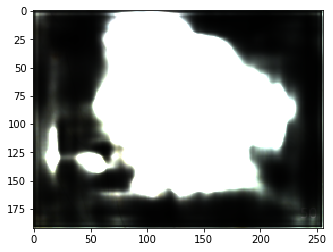

In [108]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


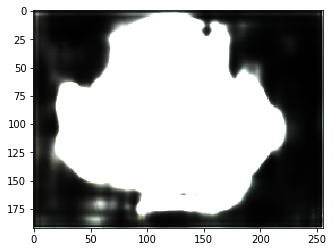

In [109]:
plt.imshow(imagesp[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


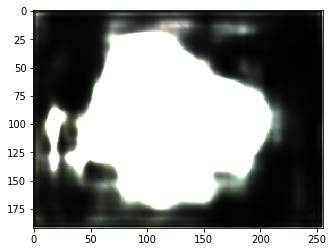

In [110]:
plt.imshow(imagesp[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


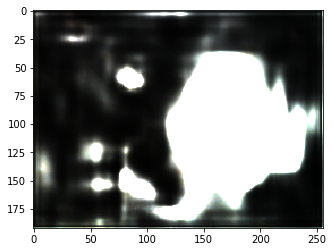

In [111]:
plt.imshow(imagesp[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


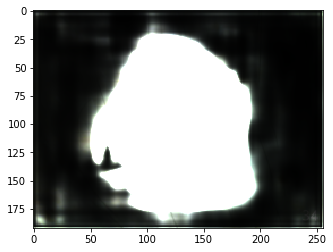

In [112]:
plt.imshow(imagesp[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


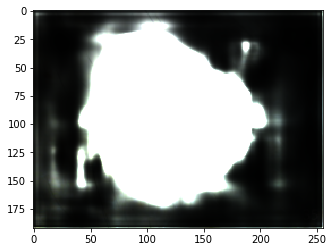

In [113]:
plt.imshow(imagesp[5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


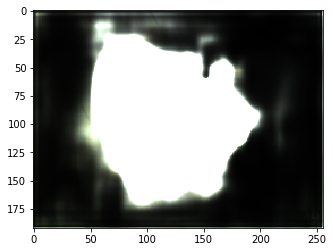

In [114]:
plt.imshow(imagesp[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


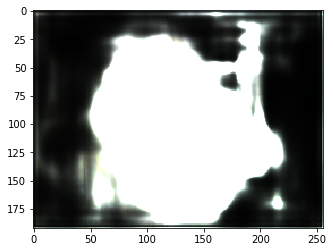

In [115]:
plt.imshow(imagesp[7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


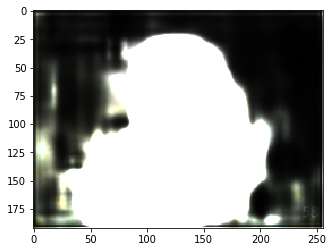

In [116]:
plt.imshow(imagesp[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


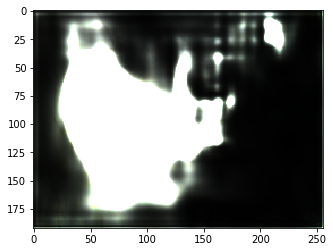

In [117]:
plt.imshow(imagesp[9])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


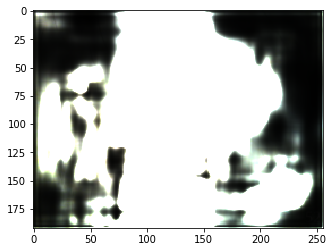

In [118]:
plt.imshow(imagesp[10])

In [119]:
pigmented[0]

-18.159509888980942

In [120]:
pigmented[10]

-19.192693872114504

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


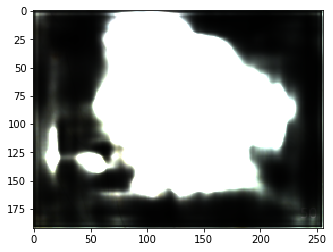

In [121]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


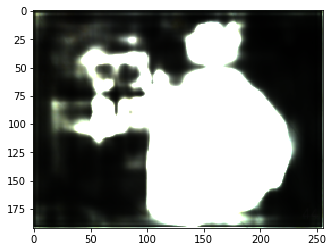

In [122]:
plt.imshow(imagesp[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


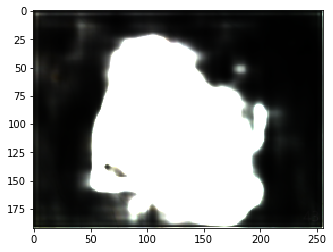

In [123]:
plt.imshow(imagesp[12])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


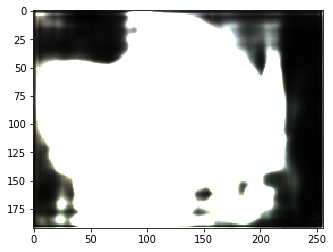

In [124]:
plt.imshow(imagesp[13])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


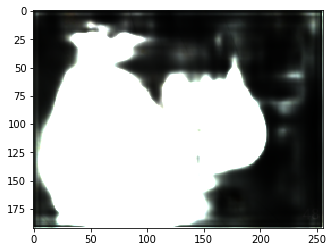

In [125]:
plt.imshow(imagesp[14])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


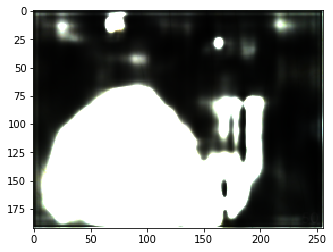

In [126]:
plt.imshow(imagesp[15])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


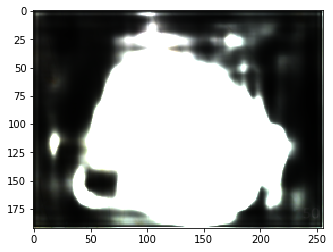

In [127]:
plt.imshow(imagesp[16])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


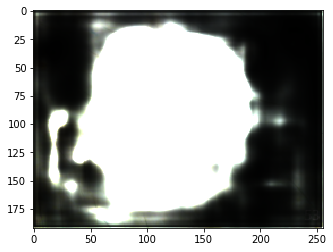

In [128]:
plt.imshow(imagesp[17])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


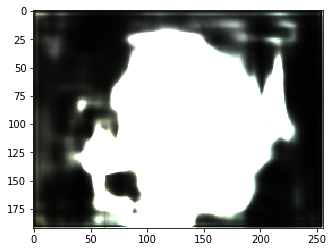

In [129]:
plt.imshow(imagesp[18])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


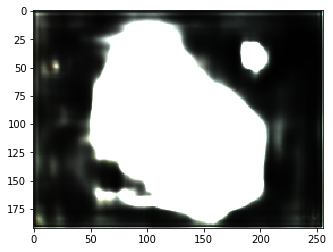

In [130]:
plt.imshow(imagesp[19])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


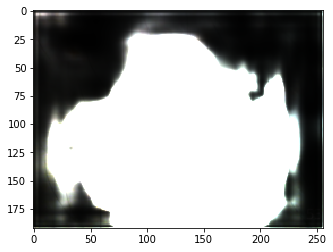

In [131]:
plt.imshow(imagesp[20])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


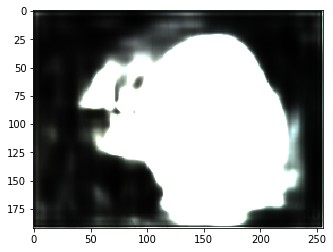

In [132]:
plt.imshow(imagesp[21])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


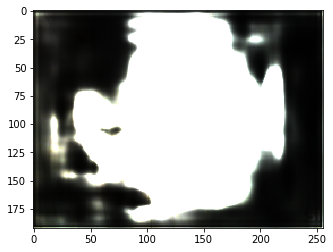

In [133]:
plt.imshow(imagesp[22])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


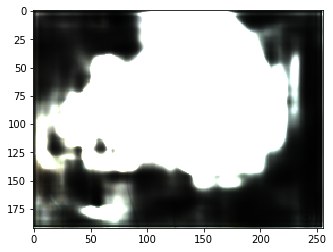

In [134]:
plt.imshow(imagesp[23])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


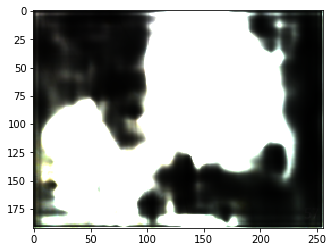

In [135]:
plt.imshow(imagesp[24])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


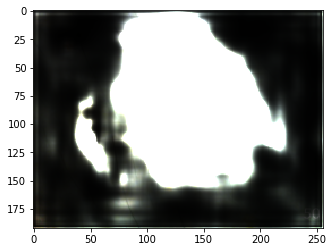

In [136]:
plt.imshow(imagesp[25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


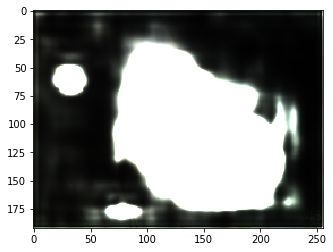

In [137]:
plt.imshow(imagesp[26])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


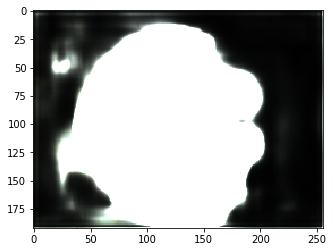

In [138]:
plt.imshow(imagesp[27])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


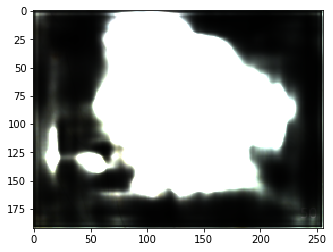

In [139]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

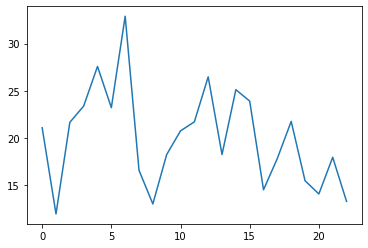

In [142]:
plt.plot(test)

In [143]:
filenames

['ISIC_0000000r_segmentation.png',
 'ISIC_0000000f_segmentation.png',
 'ISIC_0000000_segmentation.png',
 'ISIC_0000001f_segmentation.png',
 'ISIC_0000008r_segmentation.png',
 'ISIC_0000008_segmentation.png',
 'ISIC_0000007_segmentation.png',
 'ISIC_0000001_segmentation.png',
 'ISIC_0000007r_segmentation.png',
 'ISIC_0000008f_segmentation.png',
 'ISIC_0000001r_segmentation.png',
 'ISIC_0000007f_segmentation.png',
 'ISIC_0000016r_segmentation.png',
 'ISIC_0000016f_segmentation.png',
 'ISIC_0000016_segmentation.png',
 'ISIC_0000024f_segmentation.png',
 'ISIC_0000024_segmentation.png',
 'ISIC_0000025f_segmentation.png',
 'ISIC_0000024r_segmentation.png',
 'ISIC_0000029r_segmentation.png',
 'ISIC_0000029_segmentation.png',
 'ISIC_0000028r_segmentation.png',
 'ISIC_0000025r_segmentation.png',
 'ISIC_0000025_segmentation.png',
 'ISIC_0000029f_segmentation.png',
 'ISIC_0000028f_segmentation.png',
 'ISIC_0000028_segmentation.png',
 'ISIC_0000031r_segmentation.png',
 'ISIC_0000031f_segmentation.

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

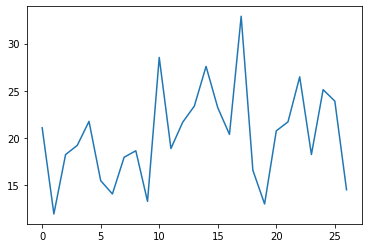

In [146]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [148]:
normal.shape

(27,)

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

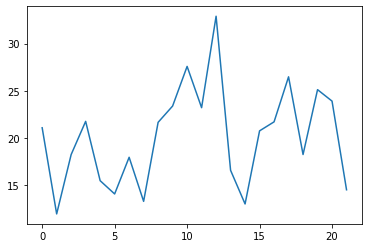

In [152]:
plt.plot(normal-pigmented)

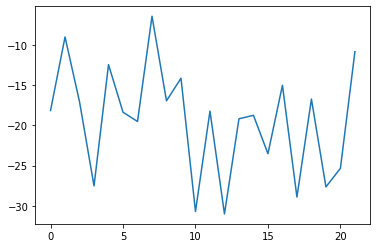

In [153]:
plt.plot(pigmented)

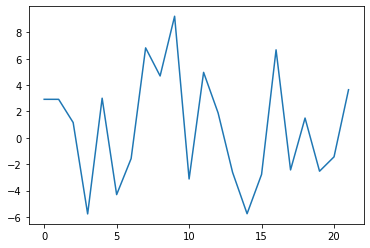

In [154]:
plt.plot(normal)

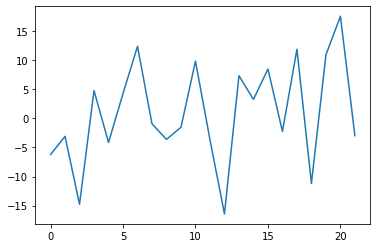

In [155]:
plt.plot(pigmented/normal)

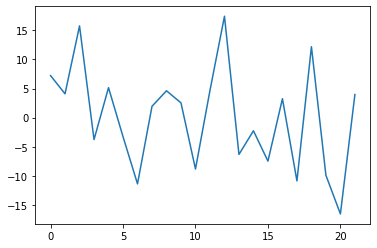

In [156]:
plt.plot((normal - pigmented)/normal)

In [157]:
new_files_names

array(['ISIC_0000000r_segmentation.png', 'ISIC_0000000f_segmentation.png',
       'ISIC_0000000_segmentation.png', 'ISIC_0000008r_segmentation.png',
       'ISIC_0000008_segmentation.png', 'ISIC_0000007_segmentation.png',
       'ISIC_0000001_segmentation.png', 'ISIC_0000008f_segmentation.png',
       'ISIC_0000016r_segmentation.png', 'ISIC_0000016f_segmentation.png',
       'ISIC_0000016_segmentation.png', 'ISIC_0000024f_segmentation.png',
       'ISIC_0000025f_segmentation.png', 'ISIC_0000024r_segmentation.png',
       'ISIC_0000029r_segmentation.png', 'ISIC_0000029_segmentation.png',
       'ISIC_0000028r_segmentation.png', 'ISIC_0000025r_segmentation.png',
       'ISIC_0000025_segmentation.png', 'ISIC_0000029f_segmentation.png',
       'ISIC_0000028f_segmentation.png', 'ISIC_0000028_segmentation.png'],
      dtype='<U30')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


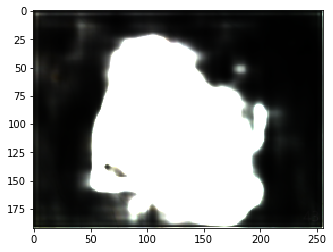

In [158]:
plt.imshow(imagesp[12])